# Libraries and functions

In [1]:
!pip install imblearn

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import log_loss, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import zipfile
pd.set_option('precision', 2)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import Isomap
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LSTM, RepeatVector, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.models import Model, Sequential
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical, plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#with zipfile.ZipFile("drive/My Drive/dat_res_zip.zip","r") as dat_res_zip:
#    dat_res_zip.extractall()

# Development

In [5]:
cnt=int(input('Choose control conditions: input 1-for small groups without healthy,2-for small group with healthy,3-for wide cancer groups with healthy\n'))

Choose control conditions: input 1-for small groups without healthy,2-for small group with healthy,3-for wide cancer groups with healthy
3


## Prepare for upload

In [6]:
if cnt==4: 
 dep_var=pd.read_csv('drive/My Drive/dep_var.csv')
 dep_var.x.value_counts().head(50)
 dep_var=dep_var.drop('Unnamed: 0',axis=1)
 dep_var
 with zipfile.ZipFile("drive/My Drive/dat_zip1.zip","r") as dat_zip1:
    dat_zip1.extractall()
 with zipfile.ZipFile("drive/My Drive/dat_zip2.zip","r") as dat_zip2:
    dat_zip2.extractall()
 with zipfile.ZipFile("drive/My Drive/dat_zip3.zip","r") as dat_zip3:
    dat_zip3.extractall()
 with zipfile.ZipFile("drive/My Drive/dat_zip4.zip","r") as dat_zip4:
    dat_zip4.extractall()
 with zipfile.ZipFile("drive/My Drive/dat_zip5.zip","r") as dat_zip5:
    dat_zip5.extractall()
 pd.read_csv('49.csv').to_csv(' 49 .csv')
 pd.read_csv('74.csv').to_csv(' 74 .csv')
 pd.read_csv(' 49 .csv')
 dat_res1=pd.DataFrame()
 for s in range(1,55):
  print(s)
  dat_res_=0
  dat_res_=pd.DataFrame()
  dat_res_=pd.read_csv(' '+str(s)+' '+'.csv',index_col='V1').drop(['Unnamed: 0'],axis=1)
  dat_res1=pd.concat([dat_res1,dat_res_],axis=0)
 dat_res1
 dat_res2=pd.DataFrame()
 for s in range(55,82):
  print(s)
  dat_res_=0
  dat_res_=pd.DataFrame()
  dat_res_=pd.read_csv(' '+str(s)+' '+'.csv',index_col='V1').drop(['Unnamed: 0'],axis=1)
  dat_res2=pd.concat([dat_res2,dat_res_],axis=0)
 dat_res2

## Unzip

In [ ]:
# with zipfile.ZipFile("drive/My Drive/dat_res_zip.zip","r") as dat_res_zip:
    dat_res_zip.extractall()

## Upload dataset

### Core dataset

In [8]:
dep_var=pd.read_csv('drive/My Drive/dep_var.csv')
dep_var.x.value_counts().head(24)

normal                                                9450
acute myeloid leukaemia                                974
chronic lymphocytic leukaemia                          757
breast cancer                                          715
breast adenocarcinoma                                  567
multiple myeloma                                       532
diffuse large B-cell lymphoma                          460
colorectal adenocarcinoma                              366
hepatocellular carcinoma                               362
ovarian carcinoma                                      331
melanoma                                               321
neuroblastoma                                          283
lung adenocarcinoma                                    273
gastric cancer                                         260
Pre-B-ALL/c-ALL                                        253
cervical adenocarcinoma                                238
multiple sclerosis or clinically isolated syndrome     2

In [7]:
if cnt==4: 
 dat_res=pd.read_csv('dat_res.csv',index_col='V1')
 dat_res=dat_res.drop(['Unnamed: 0.1'],axis=1)
 dat_res=dat_res.astype('float16').T
 #dat_res=dat_res.drop('Disease',axis=1)
 dat_res=dat_res.reset_index(drop=True)
 dat_res['Disease']=dep_var['x']
 dat_res
 dat_res.apply('max',axis=0)
 dat_res.apply('min',axis=0)
 dat_res.isna().sum().max()
 dat_res.info()

### dataset1

In [8]:
if cnt==4: 
 lsta=list(dep_var.x.value_counts().head(7).index)
 dat_resa=dat_res.set_index('Disease').loc[lsta].reset_index()
 dat_resa
 dat_resn=dat_resa[dat_resa.Disease=='normal']
 dat_resn
 dat_resn=dat_resn.loc[[np.random.randint(0,9450) for i in range(1,1001)]]
 dat_resn
 dat_resa[dat_resa.Disease!='normal']
 dat_resa=pd.concat([dat_resn,dat_resa[dat_resa.Disease!='normal']],axis=0)
 #dat_resa=dat_resa[dat_resa.Disease!='normal']
 dat_resa
 dat_resa.to_csv('dat_resa1.csv')

In [9]:
if cnt<=2: 
 dat_resa=pd.read_csv('drive/My Drive/dat_resa1.csv',index_col='Unnamed: 0')

In [10]:
if cnt==1:
 dat_resa=dat_resa[dat_resa.Disease!='normal']

In [12]:
dat_resa

,Disease,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,...,244709_at,244710_at,244711_at,244712_at,244713_at,244714_at,244715_at,244716_x_at,244717_x_at,244718_at,244719_at,244720_at,244721_at,244722_at,244723_at,244724_at,244725_at,244726_at,244727_at,244728_at,244729_at,244730_x_at,244731_at,244732_at,244733_at,244734_at,244735_at,244736_at,244737_at,244738_at,244739_at,244740_at,244741_s_at,244742_at,244743_x_at,244744_at,244745_at,244746_at,244747_at,244748_at
9450,acute myeloid leukaemia,7.17,6.51,6.52,8.02,3.42,8.77,6.21,4.02,10.20,4.40,5.56,7.71,5.82,8.62,8.54,4.02,4.45,7.70,7.87,3.96,3.47,6.70,6.84,8.20,9.16,5.77,8.16,4.43,6.91,4.57,7.01,4.49,5.64,6.18,4.55,6.81,5.86,4.28,7.23,...,5.80,4.12,6.14,5.26,6.19,3.54,4.43,7.29,4.85,4.00,4.16,3.10,5.73,4.01,3.43,3.44,5.10,5.22,4.04,4.30,5.12,5.17,2.97,5.80,4.36,3.48,3.63,3.40,4.42,5.61,3.46,6.72,5.91,3.35,5.47,4.82,3.28,4.79,3.94,4.03
9451,acute myeloid leukaemia,6.64,6.50,5.81,8.41,3.42,8.48,5.34,3.99,6.50,3.74,5.52,7.66,5.94,8.56,8.50,4.07,4.47,7.27,7.97,3.34,3.51,5.81,5.54,9.95,9.58,6.36,6.82,4.46,6.94,4.23,7.64,4.21,6.05,6.80,3.40,4.70,4.83,4.43,7.32,...,5.38,4.38,5.54,4.57,6.29,3.55,3.98,6.98,4.05,4.61,4.50,3.20,7.07,4.39,3.24,3.70,4.32,7.95,3.69,4.36,4.54,5.09,3.52,4.91,5.41,3.18,3.89,3.27,5.32,5.45,3.35,7.32,7.70,3.44,6.19,7.11,3.55,4.06,3.73,3.76
9452,acute myeloid leukaemia,7.11,6.75,6.72,8.36,3.50,8.77,6.06,3.83,10.02,3.52,5.51,7.16,5.54,7.75,7.86,5.36,4.39,7.16,6.92,3.49,3.61,5.91,5.50,8.96,8.55,5.52,7.38,4.39,6.89,4.07,7.34,4.20,6.09,6.22,3.41,4.79,5.65,4.41,6.93,...,5.42,4.04,5.61,5.25,5.73,3.92,4.98,6.55,4.62,4.40,4.78,3.26,5.41,4.12,3.38,3.69,4.30,8.90,4.25,4.73,5.21,4.90,3.51,5.31,4.61,3.62,3.37,3.98,5.02,5.80,3.56,5.72,5.34,3.07,4.47,4.89,3.26,4.46,3.83,3.77
9453,acute myeloid leukaemia,6.77,7.24,6.37,7.71,3.62,8.91,5.52,3.87,6.21,4.84,5.38,7.52,5.72,8.13,8.43,4.31,4.12,7.97,8.15,3.45,3.72,5.30,5.47,9.17,8.59,5.85,6.21,4.16,6.29,4.14,6.96,4.16,5.52,6.73,3.56,5.41,6.08,4.10,6.04,...,5.42,3.86,5.59,4.79,5.93,3.53,4.55,7.87,4.46,4.59,4.55,3.38,5.71,3.88,3.59,3.60,4.18,9.39,4.35,5.19,4.66,4.85,3.35,5.09,5.34,3.85,4.30,3.68,5.07,4.84,3.70,6.46,6.50,3.76,5.86,4.16,3.33,4.40,3.75,4.30
9454,acute myeloid leukaemia,7.23,8.17,5.84,8.21,3.52,9.05,5.52,3.85,8.59,3.82,5.29,7.20,5.64,8.50,8.66,5.02,4.21,6.22,7.18,3.80,3.24,5.96,6.00,8.74,7.62,5.39,6.45,4.05,6.76,4.34,7.32,3.95,6.14,6.18,3.55,5.83,5.92,4.20,7.07,...,5.13,4.02,5.68,5.05,5.96,3.65,3.97,8.19,4.32,4.86,4.61,3.67,5.50,3.79,3.60,3.50,3.78,10.12,3.74,4.39,4.07,5.68,3.84,4.94,5.69,3.37,4.10,3.29,5.25,5.25,3.44,6.04,5.77,3.43,6.06,5.33,3.35,3.73,3.67,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13450,diffuse large B-cell lymphoma,7.12,6.54,7.12,8.17,3.43,8.11,5.62,4.02,9.48,4.00,5.18,7.31,5.56,8.64,7.75,4.84,4.34,7.04,7.14,3.44,3.43,5.59,5.44,8.73,7.94,5.48,6.60,4.54,6.44,7.09,6.90,4.36,5.62,7.28,3.81,4.77,4.93,4.43,6.76,...,5.61,4.01,5.44,4.79,6.07,3.75,4.00,6.95,4.37,4.42,3.84,3.10,5.92,4.24,3.42,3.69,4.34,5.52,4.07,4.61,5.04,5.00,3.31,5.22,4.66,3.52,3.71,3.38,4.84,5.54,3.63,6.22,6.11,3.25,5.55,4.82,3.81,4.32,4.12,3.96
13451,diffuse large B-cell lymphoma,7.09,7.85,6.21,7.62,3.91,7.32,5.42,3.83,10.44,3.52,4.84,7.77,5.48,8.59,7.91,3.92,4.14,7.70,7.60,3.35,3.31,5.36,4.70,8.48,7.73,5.23,7.85,4.61,6.19,9.29,6.75,4.03,6.76,6.28,3.48,4.61,6.24,4.43,6.50,...,5.28,4.00,4.8

### dataset2

In [ ]:
if cnt==4:
 dat_resa=dat_res[dat_res['Disease'].str.contains('lung|breast|leukaemia|lymphoma|myeloma|colon|ALL|AML|normal',regex=True)]
 dat_resa
 dat_resa.replace(to_replace=r'[^leukaemia$','^ALL$','^AML$'],value='leukaemia',regex=True)
 dat_resa.replace(regex=r'^lung$',value='lung')
 dat_resa.replace(to_replace=r'^myeloma$',value='myeloma',regex=True)
 dat_resa['Disease'].str.replace(r'^breast$','breast',regex=True)
 dat_resa.replace(to_replace=[r'^lymphoma$'],value='lymphoma',regex=True)
 dat_resa.replace(to_replace=[r'^colon$'],value='colon',regex=True)
 dat_resn=dat_resa[dat_resa.Disease=='normal']
 dat_resn
 dat_resn=dat_resn.set_index('Disease').reset_index()
 dat_resn=dat_resn.loc[[np.random.randint(0,9450) for i in range(1,2401)]]
 dat_resn
 dat_resa[dat_resa.Disease!='normal']
 dat_resa=pd.concat([dat_resn,dat_resa[dat_resa.Disease!='normal']],axis=0)
 #dat_resa=dat_resa[dat_resa.Disease!='normal']
 dat_resa
 dat_resa.to_csv('dat_resa2.csv')

In [5]:
if cnt==3:
 dat_resa=pd.read_csv('drive/My Drive/dat_resa2.csv',index_col='Unnamed: 0')

In [ ]:
dat_resa

,Disease,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,244739_at,244740_at,244741_s_at,244742_at,244743_x_at,244744_at,244745_at,244746_at,244747_at,244748_at
7022,normal,8.66,6.40,5.96,8.30,3.50,6.97,5.85,5.78,4.41,...,3.38,6.36,7.10,3.34,4.47,5.16,3.56,3.98,3.55,4.17
4001,normal,10.00,8.34,5.16,7.41,3.59,6.33,5.16,4.46,3.49,...,3.57,7.50,7.68,3.28,5.18,4.71,3.36,4.59,4.26,3.81
284,normal,9.10,7.23,6.45,7.89,3.70,7.95,5.65,3.98,6.36,...,3.87,5.41,4.33,3.36,5.10,4.55,3.33,4.24,3.71,4.12
7105,normal,6.63,8.60,5.78,7.88,3.50,8.15,5.23,4.11,6.49,...,3.66,5.74,4.55,3.19,6.13,4.59,3.51,4.80,4.00,3.85
8894,normal,10.05,6.26,5.58,8.16,3.43,7.44,5.45,4.70,8.84,...,3.26,5.96,5.04,3.10,5.47,5.16,3.74,5.04,4.21,4.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27868,breast,10.66,8.46,5.15,7.86,3.46,5.87,5.85,4.24,6.19,...,4.09,4.72,3.89,3.33,7.39,4.82,7.34,4.57,5.37,4.02
27869,breast,10.82,8.33,5.34,7.89,3.44,5.82,5.66,4.22,5.18,...,3.83,4.92,3.72,3.15,7.14,4.60,7.41,4.70,5.64,3.82
27872,leukaemia,7.46,5.31,6.89,8.06,3.46,7.20,5.65,3.82,6.73,...,3.57,5.45,4.04,3.22,5.42,5.09,3.43,4.97,3.56,3.88
27873,leukaemia,8.05,5.96,5.58,7.83,3.47,8.41,5.57,3.88,8.15,...,3.64,5.30,3.96,3.04,6.07,4.73,3.27,4.77,3.72,3.77


### dataset3

In [11]:
if cnt==4: 
 ss='multiple sclerosis '+'or'+' clinically isolated syndrome'
 lsta_=list(dep_var.x.value_counts().head(14).index)
 lsta_ex=['irritable bowel syndrome','sepsis','kidney transplant recipient','ulcerative colitis',"Crohn's disease",'septic shock','myelodysplastic syndrome','no rejection','obesity','periodontitis','asthma',ss]
 lsta_new=[ll for ll in lsta_ if ll not in lsta_ex]
 lsta_
 dat_resa=dat_res.set_index('Disease').loc[lsta_new].reset_index()
 dat_resn=dat_resa[dat_resa.Disease=='normal']
 dat_resn
 dat_resn=dat_resn.loc[[np.random.randint(0,9450) for i in range(1,6001)]]
 dat_resn
 dat_resa[dat_resa.Disease!='normal']
 dat_resa=pd.concat([dat_resn,dat_resa[dat_resa.Disease!='normal']],axis=0)
 #dat_resa=dat_resa[dat_resa.Disease!='normal']
 dat_resa
 dat_resa.to_csv('dat_resa3.csv')
 dat_resa=pd.read_csv('drive/My Drive/dat_resa3.csv',index_col='Unnamed: 0')
 #dat_resa=dat_resa.drop(['Unnamed: 0'],axis=1)
 dat_resa=dat_resa[dat_resa.Disease!='normal']
 dat_resa

## Preprocessing

### dataset1

#### full

In [ ]:
if cnt==1: 
 scaler=MinMaxScaler()
 dat_resaX=scaler.fit_transform(dat_resa.drop(['Disease'],axis=1))
 over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
 dat_resaX, dat_resaY = over_sampler.fit_resample(dat_resaX, dat_resa['Disease'])
 selector = SelectKBest(score_func=f_classif, k=60)
 dat_resaXred=selector.fit_transform(dat_resaX,dat_resaY)
 dat_resaXred
 selector.pvalues_
 selector.scores_
 dtheat=pd.DataFrame(dat_resaXred)
 dtheat['Disease']=dat_resaY
 dtheat.set_index('Disease')
 plt.figure(figsize=(16,9))
 sns.heatmap(dtheat.set_index('Disease'))
 dbscana1 = DBSCAN(eps=0.77, min_samples=18)
 dbscana1.fit_predict(dat_resaXred)
 lab1=list(dbscana1.labels_)
 lab1_=list(filter(lambda x:x>-1,lab1))
 len(lab1_)
 len(set(lab1_))
 lab1.count(-1)
 #dat_resa.drop(['dbscan'],axis=1)
 dat_resaXred_=pd.DataFrame(dat_resaXred)
 dat_resaXred_
 dat_resaXred_['Disease']=pd.DataFrame(dat_resaY)[0]
 dat_resaXred_['dbscan']=pd.DataFrame(lab1)[0]
 dat_resaXred_[dat_resaXred_['dbscan']==0]['Disease'].value_counts()
 pca_transformer = PCA(n_components=60)
 dat_resaXpca1=pca_transformer.fit(dat_resaX)
 dat_resaXpca=dat_resaXpca1.transform(dat_resaX)
 dat_resaXpca1.explained_variance_ratio_
 dat_resaXpca1.explained_variance_ratio_.cumsum()
 dat_resaXpca.shape
 dbscana4 = DBSCAN(eps=20, min_samples=100)
 dbscana4.fit_predict(dat_resaXpca)
 lab4=list(dbscana4.labels_)
 lab4_=list(filter(lambda x:x>-1,lab4))
 len(lab4_)
 len(set(lab4_))
 lab4.count(-1)
 dat_resaXpca_=pd.DataFrame(dat_resaXpca)
 dat_resaXpca_
 dat_resaXpca_['Disease']=pd.DataFrame(dat_resaY)[0]
 dat_resaXpca_['dbscan']=pd.DataFrame(lab4)[0]
 dat_resaXpca_[dat_resaXpca_['dbscan']==1]['Disease'].value_counts()
 isomap = Isomap(n_components=60, n_neighbors=30,n_jobs=-1)
 dat_resaXiso=isomap.fit_transform(dat_resaX)
 isomap.reconstruction_error()
 dbscana2 = DBSCAN(eps=88, min_samples=200)
 dbscana2.fit_predict(dat_resaXiso)
 lab2=list(dbscana2.labels_)
 lab2_=list(filter(lambda x:x>-1,lab2))
 len(lab2_)
 len(set(lab2_))
 lab2.count(-1)
 dat_resaXiso_=pd.DataFrame(dat_resaXiso)
 dat_resaXiso_
 dat_resaXiso_['Disease']=pd.DataFrame(dat_resaY)[0]
 at_resaXiso_['dbscan']=pd.DataFrame(lab2)[0]
 dat_resaXiso_[dat_resaXiso_['dbscan']==0]['Disease'].value_counts()
 input_dim = 53999
 latent_dim1 =5000
 latent_dim2=500
 latent_dim3=60
 input_layer = Input(shape=(input_dim,), name='input')

 encoded1 = Dense(latent_dim1, 
                activation='relu', name='features1')(input_layer)
 encoded2 = Dense(latent_dim2, 
                activation='relu', name='features2')(encoded1)
 encoded3 = Dense(latent_dim3, 
                activation='relu', name='features3')(encoded2)

 decoded1 = Dense(latent_dim2, activation='relu', name='reconstructed1')(encoded3)
 decoded2 = Dense(latent_dim1, activation='relu', name='reconstructed2')(decoded1)
 decoded3 = Dense(input_dim, activation='sigmoid', name='reconstructed3')(decoded2)

 autoencoder = Model(inputs=[input_layer], outputs=[decoded3])

 autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')
 autoencoder.fit(dat_resaX,dat_resaX ,
                epochs=1000,
                batch_size=3000,
                shuffle=True,
                validation_split=0.2)
 encoder = Model(input_layer, encoded3)
 dat_resaXauto = encoder.predict(dat_resaX)
 pd.DataFrame(dat_resaXauto)
 dbscana3 = DBSCAN(eps=36, min_samples=130)
 dbscana3.fit_predict(dat_resaXauto)
 lab3=list(dbscana3.labels_)
 lab3_=list(filter(lambda x:x>-1,lab3))
 len(lab3_)
 len(set(lab3_))
 lab3.count(-1)
 #dat_resa.drop(['dbscan'],axis=1)
 dat_resaXauto_=pd.DataFrame(dat_resaXauto)
 dat_resaXauto_
 dat_resaXauto_['Disease']=pd.DataFrame(dat_resaY)[0]
 dat_resaXauto_['dbscan']=pd.DataFrame(lab3)[0]
 dat_resaXauto_[dat_resaXauto_['dbscan']==0]['Disease'].value_counts()

In [ ]:
#over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
#dat_resaX, dat_resaY = over_sampler.fit_resample(dat_resaX, dat_resa['Disease'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
#selector = SelectKBest(score_func=f_classif, k=60)
#dat_resaXred=selector.fit_transform(dat_resaX,dat_resaY)
#dat_resaXred

array([[0.16082512, 0.22851822, 0.28833297, ..., 0.78715729, 0.20503282,
        0.14917261],
       [0.03386272, 0.12343708, 0.09262454, ..., 0.81120731, 0.0916849 ,
        0.11897572],
       [0.05029208, 0.13141793, 0.14103947, ..., 0.81902357, 0.08555799,
        0.24036719],
       ...,
       [0.20688506, 0.17921181, 0.34550779, ..., 0.5271126 , 0.10034334,
        0.13448381],
       [0.04730578, 0.15377759, 0.26785841, ..., 0.4305738 , 0.09390353,
        0.12993037],
       [0.04835649, 0.29835878, 0.26041321, ..., 0.4694953 , 0.05003477,
        0.10858165]])

In [ ]:
#selector.pvalues_

array([0.00000000e+000, 0.00000000e+000, 2.05148213e-195, ...,
       1.44361475e-309, 0.00000000e+000, 3.96595615e-079])

In [ ]:
#selector.scores_

array([4369.60278868,  760.49896301,  197.92206802, ...,  326.90421279,
        664.5035621 ,   77.69889259])

In [ ]:
#dtheat=pd.DataFrame(dat_resaXred)
#dtheat['Disease']=dat_resaY
#dtheat.set_index('Disease')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
Disease,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
acute myeloid leukaemia,0.16,0.23,0.29,0.17,0.17,0.18,0.16,0.13,1.03e-01,0.06,0.06,0.20,0.29,0.09,0.16,0.16,0.11,0.73,0.12,0.79,0.07,0.73,0.08,0.59,0.59,0.22,0.30,0.25,0.49,0.55,0.11,0.67,0.14,0.09,0.03,0.17,0.11,0.06,0.06,0.81,0.09,0.50,0.61,0.07,0.21,0.77,0.44,0.17,0.18,0.77,0.10,0.14,0.15,0.14,0.06,0.66,0.38,0.79,0.21,0.15
acute myeloid leukaemia,0.03,0.12,0.09,0.10,0.08,0.28,0.14,0.13,4.17e-02,0.03,0.09,0.19,0.28,0.08,0.07,0.18,0.09,0.78,0.20,0.82,0.05,0.60,0.17,0.57,0.55,0.27,0.10,0.08,0.29,0.38,0.22,0.59,0.15,0.13,0.05,0.17,0.15,0.06,0.03,0.77,0.08,0.31,0.44,0.05,0.09,0.83,0.23,0.09,0.19,0.65,0.06,0.14,0.12,0.07,0.05,0.83,0.18,0.81,0.09,0.12
acute myeloid leukaemia,0.05,0.13,0.14,0.11,0.02,0.20,0.11,0.36,1.19e-01,0.03,0.06,0.15,0.14,0.17,0.07,0.15,0.06,0.81,0.07,0.77,0.03,0.75,0.11,0.64,0.46,0.28,0.11,0.13,0.53,0.18,0.21,0.68,0.12,0.15,0.02,0.18,0.15,0.03,0.04,0.83,0.13,0.55,0.73,0.08,0.03,0.74,0.12,0.07,0.15,0.73,0.05,0.11,0.07,0.20,0.03,0.62,0.35,0.82,0.09,0.24
acute myeloid leukaemia,0.22,0.12,0.13,0.09,0.18,0.17,0.09,0.43,4.65e-02,0.11,0.18,0.25,0.05,0.15,0.11,0.24,0.13,0.78,0.13,0.74,0.05,0.70,0.14,0.57,0.63,0.24,0.09,0.11,0.36,0.17,0.18,0.55,0.06,0.19,0.05,0.20,0.19,0.09,0.08,0.87,0.19,0.42,0.51,0.17,0.24,0.81,0.09,0.03,0.12,0.68,0.14,0.16,0.17,0.00,0.24,0.78,0.53,0.72,0.07,0.11
acute myeloid leukaemia,0.08,0.08,0.21,0.08,0.10,0.30,0.01,0.08,8.45e-03,0.11,0.08,0.21,0.03,0.16,0.05,0.21,0.09,0.79,0.16,0.74,0.07,0.75,0.04,0.56,0.49,0.41,0.07,0.26,0.42,0.17,0.20,0.70,0.16,0.12,0.05,0.24,0.13,0.04,0.07,0.72,0.16,0.41,0.72,0.05,0.19,0.78,0.37,0.40,0.08,0.59,0.11,0.06,0.16,0.03,0.07,0.77,0.43,0.77,0.03,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
multiple myeloma,0.16,0.18,0.32,0.19,0.15,0.91,0.26,0.15,1.25e-01,0.09,0.10,0.18,0.09,0.15,0.17,0.35,0.16,0.78,0.18,0.48,0.07,0.17,0.20,0.46,0.47,0.95,0.17,0.28,0.45,0.14,0.56,0.11,0.16,0.16,0.11,0.13,0.10,0.06,0.05,0.61,0.18,0.47,0.09,0.20,0.38,0.56,0.22,0.42,0.22,0.46,0.21,0.18,0.14,0.23,0.09,0.75,0.20,0.65,0.08,0.09
multiple myeloma,0.07,0.21,0.48,0.21,0.34,0.72,0.10,0.25,9.06e-02,0.04,0.06,0.13,0.08,0.18,0.14,0.36,0.29,0.81,0.22,0.61,0.04,0.39,0.07,0.63,0.53,0.91,0.15,0.27,0.50,0.71,0.67,0.17,0.09,0.09,0.04,0.10,0.09,0.06,0.07,0.66,0.07,0.48,0.08,0.12,0.25,0.58,0.67,0.36,0.14,0.50,0.06,0.10,0.16,0.19,0.04,0.81,0.22,0.63,0.07,0.13
multiple myeloma,0.32,0.11,0.26,0.10,0.10,0.58,0.23,0.25,4.88e-02,0.01,0.03,0.16,0.11,0.38,0.13,0.40,0.32,0.78,0.08,0.53,0.02,0.23,0.25,0.56,0.22,0.80,0.16,0.47,0.58,0.29,0.33,0.07,0.15,0.15,0.08,0.11,0.10,0.06,0.03,0.68,0.05,0.59,0.18,0.04,0.18,0.54,0.53,0.45,0.17,0.37,0.09,0.08,0.14,0.16,0.03,0.59,0.32,0.60,0.10,0.08


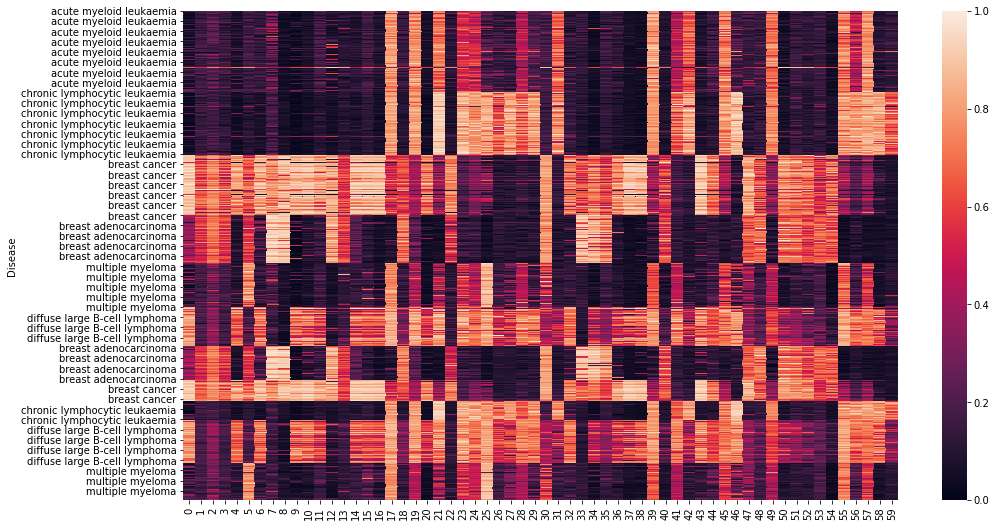

In [ ]:
#plt.figure(figsize=(16,9))
#sns.heatmap(dtheat.set_index('Disease'))

In [ ]:
#dbscana1 = DBSCAN(eps=0.77, min_samples=18)
#dbscana1.fit_predict(dat_resaXred)

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
#lab1=list(dbscana1.labels_)

In [ ]:
#lab1_=list(filter(lambda x:x>-1,lab1))

In [ ]:
#len(lab1_)

5680

In [ ]:
#len(set(lab1_))

5

In [ ]:
#lab1.count(-1)

164

In [ ]:
#dat_resa.drop(['dbscan'],axis=1)

In [ ]:
#dat_resaXred_=pd.DataFrame(dat_resaXred)
#dat_resaXred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.16,0.23,0.29,0.17,0.17,0.11,0.18,0.16,0.13,1.03e-01,0.06,0.06,0.20,0.29,0.16,0.16,0.11,0.73,0.12,0.79,0.07,0.73,0.08,0.59,0.59,0.22,0.30,0.25,0.49,0.55,0.11,0.67,0.14,0.09,0.03,0.17,0.11,0.06,0.06,0.81,0.05,0.09,0.61,0.07,0.21,0.77,0.44,0.17,0.18,0.77,0.10,0.14,0.15,0.14,0.06,0.66,0.38,0.79,0.21,0.15
1,0.03,0.12,0.09,0.10,0.08,0.17,0.28,0.14,0.13,4.17e-02,0.03,0.09,0.19,0.28,0.07,0.18,0.09,0.78,0.20,0.82,0.05,0.60,0.17,0.57,0.55,0.27,0.10,0.08,0.29,0.38,0.22,0.59,0.15,0.13,0.05,0.17,0.15,0.06,0.03,0.77,0.10,0.08,0.44,0.05,0.09,0.83,0.23,0.09,0.19,0.65,0.06,0.14,0.12,0.07,0.05,0.83,0.18,0.81,0.09,0.12
2,0.05,0.13,0.14,0.11,0.02,0.11,0.20,0.11,0.36,1.19e-01,0.03,0.06,0.15,0.14,0.07,0.15,0.06,0.81,0.07,0.77,0.03,0.75,0.11,0.64,0.46,0.28,0.11,0.13,0.53,0.18,0.21,0.68,0.12,0.15,0.02,0.18,0.15,0.03,0.04,0.83,0.07,0.13,0.73,0.08,0.03,0.74,0.12,0.07,0.15,0.73,0.05,0.11,0.07,0.20,0.03,0.62,0.35,0.82,0.09,0.24
3,0.22,0.12,0.13,0.09,0.18,0.11,0.17,0.09,0.43,4.65e-02,0.11,0.18,0.25,0.05,0.11,0.24,0.13,0.78,0.13,0.74,0.05,0.70,0.14,0.57,0.63,0.24,0.09,0.11,0.36,0.17,0.18,0.55,0.06,0.19,0.05,0.20,0.19,0.09,0.08,0.87,0.09,0.19,0.51,0.17,0.24,0.81,0.09,0.03,0.12,0.68,0.14,0.16,0.17,0.00,0.24,0.78,0.53,0.72,0.07,0.11
4,0.08,0.08,0.21,0.08,0.10,0.07,0.30,0.01,0.08,8.45e-03,0.11,0.08,0.21,0.03,0.05,0.21,0.09,0.79,0.16,0.74,0.07,0.75,0.04,0.56,0.49,0.41,0.07,0.26,0.42,0.17,0.20,0.70,0.16,0.12,0.05,0.24,0.13,0.04,0.07,0.72,0.07,0.16,0.72,0.05,0.19,0.78,0.37,0.40,0.08,0.59,0.11,0.06,0.16,0.03,0.07,0.77,0.43,0.77,0.03,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,0.17,0.18,0.06,0.13,0.18,0.67,0.72,0.16,0.28,7.89e-02,0.03,0.04,0.18,0.07,0.15,0.15,0.05,0.76,0.10,0.38,0.06,0.57,0.11,0.69,0.40,0.86,0.22,0.24,0.40,0.12,0.51,0.17,0.10,0.12,0.11,0.23,0.10,0.07,0.04,0.65,0.10,0.23,0.14,0.09,0.18,0.54,0.06,0.30,0.16,0.41,0.17,0.27,0.12,0.28,0.06,0.51,0.19,0.50,0.06,0.13
5840,0.16,0.17,0.42,0.21,0.10,0.91,0.87,0.13,0.13,1.38e-01,0.05,0.05,0.09,0.08,0.18,0.27,0.13,0.85,0.14,0.51,0.06,0.23,0.10,0.32,0.48,0.92,0.18,0.35,0.59,0.44,0.61,0.14,0.09,0.15,0.06,0.11,0.07,0.06,0.06,0.68,0.11,0.10,0.09,0.11,0.26,0.53,0.47,0.36,0.17,0.28,0.07,0.11,0.16,0.20,0.04,0.75,0.27,0.52,0.08,0.13
5841,0.21,0.18,0.35,0.19,0.05,0.78,0.77,0.10,0.09,1.10e-01,0.06,0.05,0.14,0.09,0.11,0.29,0.17,0.77,0.13,0.37,0.03,0.31,0.12,0.43,0.51,0.91,0.16,0.28,0.39,0.49,0.58,0.15,0.18,0.10,0.04,0.10,0.10,0.06,0.08,0.62,0.09,0.07,0.08,0.11,0.21,0.45,0.29,0.38,0.15,0.44,0.08,0.12,0.06,0.23,0.03,0.76,0.25,0.53,0.10,0.13
5842,0.05,0.15,0.27,0.24,0.18,0.85,0.84,0.15,0.15,8.42e-02,0.14,0.10,0.24,0.12,0.11,0.22,0.13,0.73,0.16,0.39,0.03,0.32,0.10,0.44,0.43,0.87,0.17,0.19,0.43,0.14,0.66,0.08,0.21,0.09,0.12,0.18,0.10,0.09,0.07,0.41,0.13,0.10,0.05,0.16,0.23,0.61,0.43,0.40,0.16,0.30,0.15,0.18,0.12,0.13,0.06,0.68,0.23,0.43,0.09,0.13


In [ ]:
#dat_resaXred_['Disease']=pd.DataFrame(dat_resaY)[0]

In [ ]:
#dat_resaXred_['dbscan']=pd.DataFrame(lab1)[0]

In [ ]:
#dat_resaXred_[dat_resaXred_['dbscan']==0]['Disease'].value_counts()

acute myeloid leukaemia          961
chronic lymphocytic leukaemia    959
multiple myeloma                  34
Name: Disease, dtype: int64

In [ ]:
#pca_transformer = PCA(n_components=60)

In [ ]:
#dat_resaXpca1=pca_transformer.fit(dat_resaX)

In [ ]:
#dat_resaXpca=dat_resaXpca1.transform(dat_resaX)

In [ ]:
#dat_resaXpca1.explained_variance_ratio_

array([0.16015719, 0.09452069, 0.0712438 , 0.05569434, 0.05316155,
       0.03862302, 0.03431632, 0.02204739, 0.02066261, 0.01815106,
       0.0151661 , 0.01434258, 0.01120848, 0.00947587, 0.00884937,
       0.00785274, 0.006887  , 0.00653459, 0.00574301, 0.00530054,
       0.00449575, 0.00413886, 0.00401434, 0.00374498, 0.00366923,
       0.00324254, 0.00309565, 0.0029897 , 0.00276695, 0.0027208 ,
       0.00257569, 0.00252548, 0.00243606, 0.00233934, 0.00219201,
       0.00212691, 0.00202736, 0.00199982, 0.00184769, 0.00183177,
       0.0018061 , 0.00174148, 0.00170855, 0.00163619, 0.00161672,
       0.00159111, 0.00155572, 0.00153339, 0.00150943, 0.00143526,
       0.00139247, 0.00138493, 0.0013686 , 0.00131671, 0.00131278,
       0.00125324, 0.00124259, 0.0012174 , 0.00117895, 0.0011451 ])

In [ ]:
#dat_resaXpca1.explained_variance_ratio_.cumsum()

array([0.16015719, 0.25467788, 0.32592168, 0.38161602, 0.43477757,
       0.47340059, 0.50771691, 0.52976429, 0.5504269 , 0.56857796,
       0.58374405, 0.59808663, 0.60929511, 0.61877098, 0.62762035,
       0.6354731 , 0.64236009, 0.64889468, 0.65463769, 0.65993823,
       0.66443398, 0.66857285, 0.67258719, 0.67633217, 0.6800014 ,
       0.68324394, 0.68633959, 0.68932929, 0.69209624, 0.69481704,
       0.69739273, 0.69991822, 0.70235427, 0.70469362, 0.70688562,
       0.70901253, 0.71103989, 0.71303971, 0.71488741, 0.71671917,
       0.71852527, 0.72026675, 0.7219753 , 0.72361149, 0.72522822,
       0.72681933, 0.72837505, 0.72990844, 0.73141787, 0.73285313,
       0.7342456 , 0.73563053, 0.73699913, 0.73831584, 0.73962862,
       0.74088186, 0.74212446, 0.74334186, 0.74452081, 0.74566591])

In [ ]:
#dat_resaXpca.shape

(5844, 60)

In [ ]:
#dbscana4 = DBSCAN(eps=20, min_samples=100)
#dbscana4.fit_predict(dat_resaXpca)

array([1, 0, 0, ..., 5, 5, 5])

In [ ]:
#lab4=list(dbscana4.labels_)

In [ ]:
#lab4_=list(filter(lambda x:x>-1,lab4))

In [ ]:
#len(lab4_)

5409

In [ ]:
#len(set(lab4_))

7

In [ ]:
#lab4.count(-1)

435

In [ ]:
#dat_resaXpca_=pd.DataFrame(dat_resaXpca)
#dat_resaXpca_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,8.09,9.49,-1.18,-8.44,-1.61e+00,16.57,5.33,-2.82,-2.33,-0.84,-0.22,5.26,1.86,0.25,-1.25,-1.51,3.59,-0.81,-3.38,-2.90,1.30e+00,-3.81,2.34,-1.22,1.16,-1.55,2.69,-1.44,-2.25,-3.18,-4.01,-1.96,-1.06,-0.85,1.16,-1.57,-3.74,0.41,-3.57,-2.26,0.39,1.05,2.36,5.56,2.92,-1.33,-0.62,-2.26,1.74,2.07,-0.36,-2.83,-1.64,-0.66,1.05,2.18,1.76,0.75,2.27,-1.79
1,4.93,0.16,11.65,-5.41,-1.88e+00,-6.80,10.33,-4.32,-3.72,3.86,2.36,-0.25,5.94,-0.82,-2.86,-1.58,4.22,5.31,-3.53,-5.72,4.37e+00,-0.06,-0.96,0.11,1.34,2.06,-3.74,-1.45,-2.08,-2.47,1.59,-1.72,0.30,0.88,0.20,2.55,-4.68,-1.10,-0.16,-3.86,-0.72,0.05,-0.96,0.86,-0.16,1.24,-1.35,-2.74,1.88,0.42,2.26,-1.05,-0.91,-1.37,1.65,0.64,-2.51,0.68,1.99,-0.43
2,15.03,-1.31,6.67,-7.80,8.13e+00,4.99,9.43,-3.02,-1.16,-8.72,0.11,-2.49,4.68,1.45,2.65,0.63,0.83,-2.43,3.25,2.29,1.41e+00,-1.97,0.92,2.63,-1.12,0.74,-1.26,-2.40,-1.01,-0.37,-0.10,1.46,2.41,0.55,0.69,-1.47,-0.51,0.26,2.40,2.71,1.39,-1.39,1.70,-3.25,-0.53,-2.16,-0.41,2.14,1.81,-0.45,-1.72,-1.36,-0.30,-1.57,-1.96,1.08,-0.38,0.29,2.06,0.50
3,6.30,-6.56,7.00,-2.90,6.88e-03,-0.69,13.98,-5.73,0.37,1.02,2.64,-5.58,5.03,2.61,0.75,2.43,5.83,4.30,1.74,-1.69,1.76e+00,-0.60,1.76,2.94,-1.46,2.99,1.32,-3.46,-2.73,-1.06,1.94,-1.32,-2.81,1.51,-0.45,3.31,-3.01,-1.90,-2.31,-2.15,1.20,0.54,-0.29,-2.45,2.66,-0.59,-0.03,0.82,-0.07,0.02,-0.79,-0.45,0.42,-0.56,1.45,-0.46,-2.40,0.83,-0.13,2.38
4,7.84,-5.83,8.44,-5.05,2.15e+00,-2.98,12.98,-3.83,-2.10,-2.36,1.16,-2.56,4.24,-0.65,-1.17,2.42,2.76,4.69,-2.07,-2.04,1.92e-01,-3.27,-0.09,3.59,-0.35,2.35,2.58,-0.18,-4.82,1.57,1.86,0.23,-0.50,2.33,-0.37,2.36,-1.36,-1.68,-0.34,-1.85,0.79,0.86,-1.74,-5.32,2.28,-1.18,0.18,1.13,-1.41,0.37,-1.18,-0.15,1.06,-1.46,0.26,-0.11,-2.76,0.50,0.23,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,8.20,13.90,-4.45,9.86,9.52e+00,-4.20,3.14,1.89,3.18,-2.53,-4.60,0.81,1.93,3.40,-6.29,0.47,0.16,-1.91,-0.45,0.93,-7.85e-01,0.37,-0.96,-0.35,0.27,-0.79,1.14,0.13,0.51,1.64,-0.23,-0.28,0.22,-0.76,-0.89,-1.04,1.91,0.15,0.30,0.32,-1.55,0.38,0.09,0.69,0.35,-0.61,-0.52,-0.97,-0.39,-0.40,0.57,-0.61,0.44,-1.05,0.83,-1.16,-1.35,-0.94,0.23,0.33
5840,5.47,18.52,-7.71,15.76,4.46e+00,1.03,-1.98,0.21,-2.11,0.88,4.16,2.05,-1.69,1.76,6.30,-0.31,-2.24,0.61,-1.13,0.60,4.45e-01,-3.24,-1.21,0.41,-0.86,1.52,-0.29,-1.13,-0.78,3.26,0.46,0.20,0.25,0.53,-0.07,-1.83,-1.00,-2.32,1.02,-0.53,-0.02,-3.39,1.29,-0.68,0.33,-1.56,0.40,1.06,-3.16,-0.07,0.37,0.76,0.68,0.35,1.61,-0.24,0.12,-1.33,1.24,0.84
5841,4.26,18.85,-9.18,16.30,3.87e+00,-0.73,-1.35,-0.15,-0.10,1.89,3.17,-0.63,0.56,0.95,3.63,-1.81,1.27,1.68,-0.94,-3.20,1.05e+00,-0.77,-1.14,-0.69,-1.33,0.90,-0.96,-0.30,2.59,-1.20,1.08,1.17,-1.59,-0.98,-0.10,-0.90,-0.97,-0.50,0.39,0.40,-0.35,-0.83,0.55,0.37,1.15,-1.02,1.95,1.90,1.41,-0.31,-1.20,0.61,-1.82,-0.97,-0.73,0.57,1.18,2.27,0.24,0.45
5842,2.13,18.51,-4.90,14.89,-2.43e+00,-2.88,-1.83,-2.50,-7.94,0.38,0.82,1.70,1.35,3.03,7.05,-1.29,-3.35,2.54,-0.03,1.41,1.43e+00,-2.56,-2.05,1.64,0.33,1.37,2.34,0.12,-2.07,-1.16,3.21,-2.51,-3.19,2.48,-0.87,-0.81,-3.39,0.95,1.02,-1.15,-0.08,0.11,0.14,-1.73,-1.92,1.14,-1.08,0.99,0.72,-0.78,0.07,1.66,0.07,1.44,-0.01,-0.95,0.98,1.60,0.29,-1.57


In [ ]:
#dat_resaXpca_['Disease']=pd.DataFrame(dat_resaY)[0]

In [ ]:
#dat_resaXpca_['dbscan']=pd.DataFrame(lab4)[0]

In [ ]:
#dat_resaXpca_[dat_resaXpca_['dbscan']==1]['Disease'].value_counts()

chronic lymphocytic leukaemia    959
acute myeloid leukaemia          351
Name: Disease, dtype: int64

In [ ]:
#isomap = Isomap(n_components=60, n_neighbors=30,n_jobs=-1)
#dat_resaXiso=isomap.fit_transform(dat_resaX)

In [ ]:
#isomap.reconstruction_error()

758.7973986977535

In [ ]:
#dbscana2 = DBSCAN(eps=88, min_samples=200)
#dbscana2.fit_predict(dat_resaXiso)

array([-1,  0, -1, ...,  4,  4,  4])

In [ ]:
#lab2=list(dbscana2.labels_)

In [ ]:
#lab2_=list(filter(lambda x:x>-1,lab2))

In [ ]:
#len(lab2_)

4645

In [ ]:
#len(set(lab2_))

5

In [ ]:
#lab2.count(-1)

1199

In [ ]:
#dat_resaXiso_=pd.DataFrame(dat_resaXiso)
#dat_resaXiso_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-71.53,38.63,20.87,36.94,-57.42,-4.21,-6.76,-2.18,-28.79,0.23,21.91,7.38,0.55,-13.87,-1.24,9.65,2.17,24.18,-6.63,7.61,-1.57,-9.95,-16.51,8.58,-0.52,1.79,-0.20,-14.49,4.37,1.96,-2.58,8.72,-7.34,-1.04,-2.91,1.02,-8.07,-1.52,-9.13,-1.40e+01,4.58,7.16,-4.76,2.91,1.31,-8.36,3.47,-3.79,-0.32,1.73,-7.18,7.26,1.08,-3.49,-2.88,0.70,6.99,4.05,-0.20,7.96
1,-44.48,13.78,53.00,39.41,19.06,-9.08,-27.76,0.24,13.73,-5.85,-21.44,-16.84,14.58,24.44,-12.66,-3.99,1.51,-5.42,-11.62,2.28,8.10,-1.04,3.88,-4.57,-10.48,10.10,4.13,-19.00,-2.13,-1.94,2.83,3.94,-11.74,4.53,-5.05,6.45,-6.83,-2.36,1.89,-1.15e+01,-2.13,0.47,0.66,-11.98,-6.89,-7.13,9.94,7.08,7.53,-3.58,-5.54,1.48,-4.20,5.63,1.14,-6.02,5.22,9.46,1.31,-6.62
2,-81.07,15.33,70.66,52.10,-7.90,11.38,4.65,-18.76,17.11,14.58,-3.45,5.34,-23.96,15.67,19.77,5.88,-6.82,-7.03,0.34,10.49,6.87,-6.09,1.22,-18.05,-7.09,16.11,-6.08,2.43,-0.86,-9.25,-15.92,12.34,4.60,3.16,5.60,1.56,0.72,-3.43,-0.55,8.28e+00,-7.16,4.31,1.38,-3.82,5.23,8.62,10.20,11.25,3.39,-11.91,-8.39,-9.76,-17.47,-2.28,-7.31,-0.13,-10.82,7.68,4.58,-1.82
3,-57.82,2.64,38.71,43.82,2.17,5.25,-20.24,6.39,19.50,15.54,-17.56,-11.67,26.90,17.72,-0.90,-13.76,-7.66,5.36,-9.34,-0.14,10.75,4.77,-3.46,-5.69,-12.70,7.78,18.28,-3.74,11.90,0.37,4.60,-11.47,-12.55,5.60,-8.74,-5.54,-22.42,-3.94,4.64,-1.53e+01,3.44,-8.06,-7.95,1.38,-16.99,-14.63,-1.08,10.72,11.10,-6.59,-2.38,1.44,-5.59,5.19,8.00,-8.85,16.60,-1.40,2.02,2.79
4,-54.03,12.04,43.23,45.89,20.66,5.91,-25.03,7.48,20.13,11.84,-18.51,-21.11,26.01,17.24,-2.47,-5.15,-9.15,-11.21,-14.24,4.59,10.05,13.42,6.53,-21.46,-8.65,10.07,4.82,-15.60,-7.54,5.53,14.20,2.95,-9.84,5.96,-4.40,-6.71,-13.86,0.68,4.57,-1.41e+01,-2.78,-2.95,-3.11,-9.21,-11.95,-6.53,8.32,9.06,9.28,-2.64,-8.10,7.08,-5.30,2.80,4.92,-12.23,2.18,-1.07,0.84,-2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,-45.05,103.74,-12.66,-46.17,-11.52,7.95,6.57,0.54,22.62,-3.32,8.39,2.53,5.20,-10.67,-11.24,6.08,-5.23,-1.59,3.73,3.95,-2.82,-1.72,8.83,3.29,-1.81,2.98,4.02,-3.31,2.38,-2.46,-3.31,-1.35,-3.79,1.68,2.70,0.91,5.81,1.04,-0.43,-9.94e-01,-4.22,3.24,-2.57,1.20,-3.70,-4.96,7.31,-5.32,4.03,-1.58,-2.09,0.27,-3.79,-4.61,-3.15,0.79,0.30,0.05,0.40,1.71
5840,17.10,68.20,-41.24,-18.55,24.07,48.25,-18.36,-15.96,-24.63,11.70,-18.65,2.38,-1.91,14.54,11.48,-1.99,-1.85,-5.14,1.58,0.70,0.90,1.56,-9.01,5.44,-10.75,-8.80,-8.00,-1.81,10.85,-3.79,-7.28,-0.67,0.93,3.71,1.54,-5.81,10.40,6.41,2.97,3.95e+00,-4.70,0.47,-5.16,-2.43,-9.68,-9.17,4.74,-5.42,-1.75,-0.25,-5.06,0.97,-3.97,2.54,-0.68,7.50,3.35,-0.84,3.53,-3.99
5841,13.23,72.09,-37.87,-19.53,1.48,30.26,-8.16,-15.01,-10.25,14.55,-19.89,-9.68,-9.83,4.48,-4.79,-7.61,-1.87,4.65,11.45,0.66,0.69,-7.02,-5.33,15.42,-9.95,-6.92,4.54,-2.05,2.38,1.88,-14.51,3.70,-12.41,3.79,2.69,0.27,11.22,5.76,2.31,1.22e+01,-17.02,5.73,1.01,0.57,-5.44,7.18,5.06,-10.65,-1.84,-1.74,-4.21,4.58,-3.06,-2.12,-5.60,-8.17,-12.35,-8.51,-0.58,-2.57
5842,18.80,80.12,-49.56,8.60,19.49,8.64,-33.13,-20.51,-19.83,20.86,-12.63,6.37,21.27,0.21,-22.21,-0.92,-4.32,0.25,-0.82,4.03,-5.64,-15.39,-6.69,-3.60,-9.78,2.52,-3.51,1.86,-8.99,9.05,2.74,-3.36,3.54,-2.14,2.83,3.65,-5.40,-9.60,0.74,7.01e-03,6.09,-2.23,4.91,-3.70,5.60,-1.80,1.49,-4.29,-0.70,-2.66,-3.04,3.50,3.81,-1.55,-1.27,0.12,1.27,5.84,1.42,2.82


In [ ]:
#dat_resaXiso_['Disease']=pd.DataFrame(dat_resaY)[0]

In [ ]:
#dat_resaXiso_['dbscan']=pd.DataFrame(lab2)[0]

In [ ]:
#dat_resaXiso_[dat_resaXiso_['dbscan']==0]['Disease'].value_counts()

acute myeloid leukaemia          505
multiple myeloma                  27
chronic lymphocytic leukaemia      1
Name: Disease, dtype: int64

In [ ]:
#input_dim = 53999
#latent_dim1 =5000
#latent_dim2=500
#latent_dim3=60
#input_layer = Input(shape=(input_dim,), name='input')

#encoded1 = Dense(latent_dim1, 
#                activation='relu', name='features1')(input_layer)
#encoded2 = Dense(latent_dim2, 
#                activation='relu', name='features2')(encoded1)
#encoded3 = Dense(latent_dim3, 
#                activation='relu', name='features3')(encoded2)

#decoded1 = Dense(latent_dim2, activation='relu', name='reconstructed1')(encoded3)
#decoded2 = Dense(latent_dim1, activation='relu', name='reconstructed2')(decoded1)
#decoded3 = Dense(input_dim, activation='sigmoid', name='reconstructed3')(decoded2)

#autoencoder = Model(inputs=[input_layer], outputs=[decoded3])

#autoencoder.compile(optimizer='adam', 
#                    loss='binary_crossentropy')

In [ ]:
#autoencoder.fit(dat_resaX,dat_resaX ,
#                epochs=1000,
#                batch_size=3000,
#                shuffle=True,
#                validation_split=0.2)

Epoch 1/1000
2/2 [==============================] - 2s 857ms/step - loss: 0.6925 - val_loss: 0.6456
Epoch 2/1000
2/2 [==============================] - 2s 957ms/step - loss: 0.6433 - val_loss: 0.9775
Epoch 3/1000
2/2 [==============================] - 2s 952ms/step - loss: 0.8606 - val_loss: 0.6570
Epoch 4/1000
2/2 [==============================] - 2s 958ms/step - loss: 0.6501 - val_loss: 0.6312
Epoch 5/1000
2/2 [==============================] - 2s 961ms/step - loss: 0.6249 - val_loss: 0.6089
Epoch 6/1000
2/2 [==============================] - 2s 957ms/step - loss: 0.6110 - val_loss: 0.6116
Epoch 7/1000
2/2 [==============================] - 2s 960ms/step - loss: 0.6112 - val_loss: 0.6069
Epoch 8/1000
2/2 [==============================] - 2s 953ms/step - loss: 0.6061 - val_loss: 0.6050
Epoch 9/1000
2/2 [==============================] - 2s 954ms/step - loss: 0.6051 - val_loss: 0.6043
Epoch 10/1000
2/2 [==============================] - 2s 954ms/step - loss: 0.6045 - val_loss: 0.6033

In [ ]:
#encoder = Model(input_layer, encoded3)

In [ ]:
#dat_resaXauto = encoder.predict(dat_resaX)

In [ ]:
#pd.DataFrame(dat_resaXauto)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.00,0.0,0.0,17.41,54.79,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,8.80,8.99,0.0,0.0,0.0,9.08,0.0,13.89,0.0,3.96,0.0,21.50,0.0,0.0,0.0,0.00,0.0,39.93,3.59,74.70,0.0,0.0,59.96,15.43,0.0,25.16,11.27,42.03,0.0,0.0,0.0,0.0,0.0,0.0,25.56,0.0,11.02,0.0,0.0,0.0,0.0,0.0,10.67,0.0
1,0.0,0.0,10.96,0.0,0.0,11.25,47.48,0.0,0.0,0.0,0.0,4.09,0.0,0.0,0.0,0.0,28.31,6.35,0.0,0.0,0.0,24.13,0.0,4.30,0.0,0.00,0.0,43.52,0.0,0.0,0.0,0.00,0.0,40.52,19.00,32.74,0.0,0.0,26.97,48.23,0.0,41.20,11.17,26.80,0.0,0.0,0.0,0.0,0.0,0.0,39.07,0.0,23.46,0.0,0.0,0.0,0.0,0.0,16.31,0.0
2,0.0,0.0,8.27,0.0,0.0,10.33,48.98,0.0,0.0,0.0,0.0,8.96,0.0,0.0,0.0,0.0,3.76,14.76,0.0,0.0,0.0,23.43,0.0,15.88,0.0,8.32,0.0,30.28,0.0,0.0,0.0,0.00,0.0,54.93,21.92,22.48,0.0,0.0,46.21,32.46,0.0,13.29,26.06,32.27,0.0,0.0,0.0,0.0,0.0,0.0,7.02,0.0,11.14,0.0,0.0,0.0,0.0,0.0,7.20,0.0
3,0.0,0.0,11.54,0.0,0.0,6.66,39.46,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,19.15,0.00,0.0,0.0,0.0,21.65,0.0,8.43,0.0,6.30,0.0,23.34,0.0,0.0,0.0,0.00,0.0,49.01,22.92,28.35,0.0,0.0,28.91,59.15,0.0,21.62,18.49,18.25,0.0,0.0,0.0,0.0,0.0,0.0,20.04,0.0,16.26,0.0,0.0,0.0,0.0,0.0,11.84,0.0
4,0.0,0.0,9.27,0.0,0.0,8.15,50.56,0.0,0.0,0.0,0.0,4.58,0.0,0.0,0.0,0.0,20.46,4.09,0.0,0.0,0.0,22.76,0.0,9.98,0.0,4.28,0.0,30.86,0.0,0.0,0.0,0.00,0.0,47.06,16.92,18.11,0.0,0.0,27.04,49.43,0.0,22.30,25.30,24.80,0.0,0.0,0.0,0.0,0.0,0.0,19.43,0.0,18.44,0.0,0.0,0.0,0.0,0.0,12.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,0.0,0.0,19.81,0.0,0.0,8.69,52.74,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,46.38,0.00,0.0,0.0,0.0,13.34,0.0,33.23,0.0,0.00,0.0,17.55,0.0,0.0,0.0,0.00,0.0,29.09,9.41,29.06,0.0,0.0,57.42,5.60,0.0,13.60,28.13,25.86,0.0,0.0,0.0,0.0,0.0,0.0,10.14,0.0,46.96,0.0,0.0,0.0,0.0,0.0,14.24,0.0
5840,0.0,0.0,12.89,0.0,0.0,12.28,37.06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,51.20,0.00,0.0,0.0,0.0,0.81,0.0,16.58,0.0,0.00,0.0,20.90,0.0,0.0,0.0,6.27,0.0,26.95,21.56,47.28,0.0,0.0,69.05,7.95,0.0,26.10,25.16,32.95,0.0,0.0,0.0,0.0,0.0,0.0,9.75,0.0,45.93,0.0,0.0,0.0,0.0,0.0,3.28,0.0
5841,0.0,0.0,21.99,0.0,0.0,0.00,47.47,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,40.14,0.00,0.0,0.0,0.0,16.61,0.0,28.23,0.0,0.00,0.0,4.78,0.0,0.0,0.0,0.00,0.0,36.67,7.49,30.10,0.0,0.0,43.37,19.37,0.0,4.70,34.64,30.62,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,41.57,0.0,0.0,0.0,0.0,0.0,25.13,0.0
5842,0.0,0.0,10.44,0.0,0.0,13.36,32.88,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37.18,0.00,0.0,0.0,0.0,12.62,0.0,34.28,0.0,0.00,0.0,22.96,0.0,0.0,0.0,0.00,0.0,11.77,13.71,53.02,0.0,0.0,82.16,3.03,0.0,30.50,13.56,12.53,0.0,0.0,0.0,0.0,0.0,0.0,11.50,0.0,53.16,0.0,0.0,0.0,0.0,0.0,15.54,0.0


In [ ]:
#dbscana3 = DBSCAN(eps=36, min_samples=130)
#dbscana3.fit_predict(dat_resaXauto)

array([ 1,  0, -1, ...,  4,  4, -1])

In [ ]:
#lab3=list(dbscana3.labels_)

In [ ]:
#lab3_=list(filter(lambda x:x>-1,lab3))

In [ ]:
#len(lab3_)

4653

In [ ]:
#len(set(lab3_))

5

In [ ]:
#lab3.count(-1)

1191

In [ ]:
#dat_resa.drop(['dbscan'],axis=1)

In [ ]:
#dat_resaXauto_=pd.DataFrame(dat_resaXauto)
#dat_resaXauto_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.00,0.0,0.0,17.41,54.79,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,8.80,8.99,0.0,0.0,0.0,9.08,0.0,13.89,0.0,3.96,0.0,21.50,0.0,0.0,0.0,0.00,0.0,39.93,3.59,74.70,0.0,0.0,59.96,15.43,0.0,25.16,11.27,42.03,0.0,0.0,0.0,0.0,0.0,0.0,25.56,0.0,11.02,0.0,0.0,0.0,0.0,0.0,10.67,0.0
1,0.0,0.0,10.96,0.0,0.0,11.25,47.48,0.0,0.0,0.0,0.0,4.09,0.0,0.0,0.0,0.0,28.31,6.35,0.0,0.0,0.0,24.13,0.0,4.30,0.0,0.00,0.0,43.52,0.0,0.0,0.0,0.00,0.0,40.52,19.00,32.74,0.0,0.0,26.97,48.23,0.0,41.20,11.17,26.80,0.0,0.0,0.0,0.0,0.0,0.0,39.07,0.0,23.46,0.0,0.0,0.0,0.0,0.0,16.31,0.0
2,0.0,0.0,8.27,0.0,0.0,10.33,48.98,0.0,0.0,0.0,0.0,8.96,0.0,0.0,0.0,0.0,3.76,14.76,0.0,0.0,0.0,23.43,0.0,15.88,0.0,8.32,0.0,30.28,0.0,0.0,0.0,0.00,0.0,54.93,21.92,22.48,0.0,0.0,46.21,32.46,0.0,13.29,26.06,32.27,0.0,0.0,0.0,0.0,0.0,0.0,7.02,0.0,11.14,0.0,0.0,0.0,0.0,0.0,7.20,0.0
3,0.0,0.0,11.54,0.0,0.0,6.66,39.46,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,19.15,0.00,0.0,0.0,0.0,21.65,0.0,8.43,0.0,6.30,0.0,23.34,0.0,0.0,0.0,0.00,0.0,49.01,22.92,28.35,0.0,0.0,28.91,59.15,0.0,21.62,18.49,18.25,0.0,0.0,0.0,0.0,0.0,0.0,20.04,0.0,16.26,0.0,0.0,0.0,0.0,0.0,11.84,0.0
4,0.0,0.0,9.27,0.0,0.0,8.15,50.56,0.0,0.0,0.0,0.0,4.58,0.0,0.0,0.0,0.0,20.46,4.09,0.0,0.0,0.0,22.76,0.0,9.98,0.0,4.28,0.0,30.86,0.0,0.0,0.0,0.00,0.0,47.06,16.92,18.11,0.0,0.0,27.04,49.43,0.0,22.30,25.30,24.80,0.0,0.0,0.0,0.0,0.0,0.0,19.43,0.0,18.44,0.0,0.0,0.0,0.0,0.0,12.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,0.0,0.0,19.81,0.0,0.0,8.69,52.74,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,46.38,0.00,0.0,0.0,0.0,13.34,0.0,33.23,0.0,0.00,0.0,17.55,0.0,0.0,0.0,0.00,0.0,29.09,9.41,29.06,0.0,0.0,57.42,5.60,0.0,13.60,28.13,25.86,0.0,0.0,0.0,0.0,0.0,0.0,10.14,0.0,46.96,0.0,0.0,0.0,0.0,0.0,14.24,0.0
5840,0.0,0.0,12.89,0.0,0.0,12.28,37.06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,51.20,0.00,0.0,0.0,0.0,0.81,0.0,16.58,0.0,0.00,0.0,20.90,0.0,0.0,0.0,6.27,0.0,26.95,21.56,47.28,0.0,0.0,69.05,7.95,0.0,26.10,25.16,32.95,0.0,0.0,0.0,0.0,0.0,0.0,9.75,0.0,45.93,0.0,0.0,0.0,0.0,0.0,3.28,0.0
5841,0.0,0.0,21.99,0.0,0.0,0.00,47.47,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,40.14,0.00,0.0,0.0,0.0,16.61,0.0,28.23,0.0,0.00,0.0,4.78,0.0,0.0,0.0,0.00,0.0,36.67,7.49,30.10,0.0,0.0,43.37,19.37,0.0,4.70,34.64,30.62,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,41.57,0.0,0.0,0.0,0.0,0.0,25.13,0.0
5842,0.0,0.0,10.44,0.0,0.0,13.36,32.88,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37.18,0.00,0.0,0.0,0.0,12.62,0.0,34.28,0.0,0.00,0.0,22.96,0.0,0.0,0.0,0.00,0.0,11.77,13.71,53.02,0.0,0.0,82.16,3.03,0.0,30.50,13.56,12.53,0.0,0.0,0.0,0.0,0.0,0.0,11.50,0.0,53.16,0.0,0.0,0.0,0.0,0.0,15.54,0.0


In [ ]:
#dat_resaXauto_['Disease']=pd.DataFrame(dat_resaY)[0]

In [ ]:
#dat_resaXauto_['dbscan']=pd.DataFrame(lab3)[0]

In [ ]:
#dat_resaXauto_[dat_resaXauto_['dbscan']==0]['Disease'].value_counts()

diffuse large B-cell lymphoma    963
acute myeloid leukaemia          503
breast cancer                      4
Name: Disease, dtype: int64

#### train and test

In [13]:
if cnt==1: 
 dat_resaXtr, dat_resaXts, dat_resaYtr, dat_resaYts = train_test_split(dat_resa.drop(['Disease'],axis=1),dat_resa['Disease'], 
                                                    train_size=0.75, 
                                                    test_size=0.25,
                                                    random_state=111,
                                                    shuffle=True, 
                                                    stratify=dat_resa['Disease'])
 scaler=MinMaxScaler()
 dat_resaXtr=scaler.fit(dat_resaXtr).transform(dat_resaXtr)
 dat_resaXts=scaler.fit(dat_resaXts).transform(dat_resaXts)
 over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
 dat_resaXtr, dat_resaYtr = over_sampler.fit_resample(dat_resaXtr,dat_resaYtr)
 dat_resaXts, dat_resaYts = over_sampler.fit_resample(dat_resaXts,dat_resaYts)

##### selectkbest

In [16]:
if cnt==1: 
 selector = SelectKBest(score_func=f_classif, k=60)
 dat_resaXredtr=selector.fit(dat_resaXtr,dat_resaYtr).transform(dat_resaXtr)
 dat_resaXredts=selector.fit(dat_resaXtr,dat_resaYtr).transform(dat_resaXts)
 dat_resaXredts
 selector.pvalues_
 selector.scores_

array([[0.05865022, 0.16592724, 0.35230838, ..., 0.48667567, 0.06476949,
        0.1249239 ],
       [0.06380628, 0.11889973, 0.17940385, ..., 0.55225347, 0.06545248,
        0.09777183],
       [0.37280177, 0.13339249, 0.16539668, ..., 0.78988088, 0.10893569,
        0.0765859 ],
       ...,
       [0.32428983, 0.19559854, 0.29415287, ..., 0.49540665, 0.05864796,
        0.10863451],
       [0.04020712, 0.0957912 , 0.22944503, ..., 0.5175359 , 0.07205104,
        0.08947111],
       [0.02121163, 0.1655427 , 0.35861708, ..., 0.4111663 , 0.12194177,
        0.08851615]])

##### autoencoder

In [19]:
if cnt==1: 
 input_dim = 53999
 latent_dim1 =5000
 latent_dim2=500
 latent_dim3=60
 input_layer = Input(shape=(input_dim,), name='input')

 encoded1 = Dense(latent_dim1, 
                activation='relu', name='features1')(input_layer)
 encoded2 = Dense(latent_dim2, 
                activation='relu', name='features2')(encoded1)
 encoded3 = Dense(latent_dim3, 
                activation='relu', name='features3')(encoded2)

 decoded1 = Dense(latent_dim2, activation='relu', name='reconstructed1')(encoded3)
 decoded2 = Dense(latent_dim1, activation='relu', name='reconstructed2')(decoded1)
 decoded3 = Dense(input_dim, activation='sigmoid', name='reconstructed3')(decoded2)

 autoencoder = Model(inputs=[input_layer], outputs=[decoded3])

 autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')
 autoencoder.fit(dat_resaXtr,dat_resaXtr ,
                epochs=1000,
                batch_size=3000,
                shuffle=True,
                validation_split=0.2)

In [20]:
#autoencoder.fit(dat_resaXtr,dat_resaXtr ,
#                epochs=1000,
#                batch_size=3000,
#                shuffle=True,
#                validation_split=0.2)

Epoch 1/1000
2/2 [==============================] - 1s 504ms/step - loss: 0.6929 - val_loss: 0.6526
Epoch 2/1000
2/2 [==============================] - 1s 658ms/step - loss: 0.6547 - val_loss: 0.7230
Epoch 3/1000
2/2 [==============================] - 1s 660ms/step - loss: 0.7113 - val_loss: 0.6273
Epoch 4/1000
2/2 [==============================] - 1s 662ms/step - loss: 0.6280 - val_loss: 0.6084
Epoch 5/1000
2/2 [==============================] - 1s 661ms/step - loss: 0.6090 - val_loss: 0.6103
Epoch 6/1000
2/2 [==============================] - 1s 657ms/step - loss: 0.6101 - val_loss: 0.6104
Epoch 7/1000
2/2 [==============================] - 1s 662ms/step - loss: 0.6099 - val_loss: 0.6079
Epoch 8/1000
2/2 [==============================] - 1s 659ms/step - loss: 0.6077 - val_loss: 0.6064
Epoch 9/1000
2/2 [==============================] - 1s 659ms/step - loss: 0.6066 - val_loss: 0.6064
Epoch 10/1000
2/2 [==============================] - 1s 655ms/step - loss: 0.6062 - val_loss: 0.6066

In [21]:
if cnt==1: 
 encoder = Model(input_layer, encoded3)
 dat_resaXautotr = encoder.predict(dat_resaXtr)
 dat_resaXautots = encoder.predict(dat_resaXts)

### dataset1+normal

#### train and test

In [45]:
if cnt==2: 
 dat_resaXtr, dat_resaXts, dat_resaYtr, dat_resaYts = train_test_split(dat_resa.drop(['Disease'],axis=1),dat_resa['Disease'], 
                                                    train_size=0.75, 
                                                    test_size=0.25,
                                                    random_state=111,
                                                    shuffle=True, 
                                                    stratify=dat_resa['Disease'])
 scaler=MinMaxScaler()
 dat_resaXtr=scaler.fit(dat_resaXtr).transform(dat_resaXtr)
 dat_resaXts=scaler.fit(dat_resaXts).transform(dat_resaXts)
 over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
 dat_resaXtr, dat_resaYtr = over_sampler.fit_resample(dat_resaXtr,dat_resaYtr)
 dat_resaXts, dat_resaYts = over_sampler.fit_resample(dat_resaXts,dat_resaYts)

##### selectkbest

In [48]:
if cnt==2: 
 selector = SelectKBest(score_func=f_classif, k=60)
 dat_resaXredtr=selector.fit(dat_resaXtr,dat_resaYtr).transform(dat_resaXtr)
 dat_resaXredts=selector.fit(dat_resaXtr,dat_resaYtr).transform(dat_resaXts)
 dat_resaXredts
 selector.pvalues_
 selector.scores_

array([[0.07267598, 0.77228916, 0.70724401, ..., 0.0460482 , 0.29207582,
        0.16078714],
       [0.01665771, 0.49240964, 0.37908497, ..., 0.07917059, 0.72870518,
        0.44756419],
       [0.03815153, 0.27879518, 0.34300109, ..., 0.11835196, 0.92920758,
        0.700024  ],
       ...,
       [0.04652385, 0.15557028, 0.18741078, ..., 0.04895648, 0.3015848 ,
        0.10384757],
       [0.09994088, 0.11667107, 0.12217627, ..., 0.04638883, 0.35752095,
        0.10314747],
       [0.0489423 , 0.04475157, 0.11348838, ..., 0.04712783, 0.089795  ,
        0.10130859]])

##### autoencoder

In [51]:
if cnt==2: 
 input_dim = 53999
 latent_dim1 =5000
 latent_dim2=500
 latent_dim3=60
 input_layer = Input(shape=(input_dim,), name='input')

 encoded1 = Dense(latent_dim1, 
                activation='relu', name='features1')(input_layer)
 encoded2 = Dense(latent_dim2, 
                activation='relu', name='features2')(encoded1)
 encoded3 = Dense(latent_dim3, 
                activation='relu', name='features3')(encoded2)

 decoded1 = Dense(latent_dim2, activation='relu', name='reconstructed1')(encoded3)
 decoded2 = Dense(latent_dim1, activation='relu', name='reconstructed2')(decoded1)
 decoded3 = Dense(input_dim, activation='sigmoid', name='reconstructed3')(decoded2)

 autoencoder = Model(inputs=[input_layer], outputs=[decoded3])

 autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')
 autoencoder.fit(dat_resaXtr,dat_resaXtr ,
                epochs=1000,
                batch_size=3000,
                shuffle=True,
                validation_split=0.2)

In [52]:
#autoencoder.fit(dat_resaXtr,dat_resaXtr ,
#                epochs=1000,
#                batch_size=3000,
#                shuffle=True,
#                validation_split=0.2)

Epoch 1/1000
2/2 [==============================] - 1s 723ms/step - loss: 0.6925 - val_loss: 0.6369
Epoch 2/1000
2/2 [==============================] - 2s 854ms/step - loss: 0.6411 - val_loss: 0.7423
Epoch 3/1000
2/2 [==============================] - 2s 838ms/step - loss: 0.7158 - val_loss: 0.6088
Epoch 4/1000
2/2 [==============================] - 2s 842ms/step - loss: 0.6215 - val_loss: 0.5881
Epoch 5/1000
2/2 [==============================] - 2s 845ms/step - loss: 0.5934 - val_loss: 0.6005
Epoch 6/1000
2/2 [==============================] - 2s 839ms/step - loss: 0.5994 - val_loss: 0.5919
Epoch 7/1000
2/2 [==============================] - 2s 837ms/step - loss: 0.5941 - val_loss: 0.5875
Epoch 8/1000
2/2 [==============================] - 2s 844ms/step - loss: 0.5892 - val_loss: 0.5889
Epoch 9/1000
2/2 [==============================] - 2s 842ms/step - loss: 0.5908 - val_loss: 0.5875
Epoch 10/1000
2/2 [==============================] - 2s 842ms/step - loss: 0.5890 - val_loss: 0.5870

In [53]:
if cnt==2:
 encoder = Model(input_layer, encoded3)
 dat_resaXautotr = encoder.predict(dat_resaXtr)
 dat_resaXautots = encoder.predict(dat_resaXts)

### dataset2

In [ ]:
#dat_resa=dat_resa[dat_resa.Disease!='lung']

In [ ]:
#dat_resa=dat_resa[dat_resa.Disease!='colon']

In [ ]:
#dat_resa=dat_resa[dat_resa.Disease!='myeloma']

In [ ]:
if cnt==3:
 dat_resa['Disease'].value_counts()

leukaemia    3770
normal       2400
breast       1692
lymphoma     1046
Name: Disease, dtype: int64

In [ ]:
dat_resa.to_csv('dat_resa2.csv')

#### full

In [ ]:
if cnt==3: 
 scaler=MinMaxScaler()
 dat_resaX=scaler.fit_transform(dat_resa.drop(['Disease'],axis=1))
 over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
 dat_resaX, dat_resaY = over_sampler.fit_resample(dat_resaX, dat_resa['Disease'])
 selector = SelectKBest(score_func=f_classif, k=100)
 dat_resaXred=selector.fit_transform(dat_resaX,dat_resaY)
 dat_resaXred
 selector.pvalues_
 selector.scores_
 pca_transformer = PCA(n_components=100)
 dat_resaXpca1=pca_transformer.fit(dat_resaX)
 dat_resaXpca=dat_resaXpca1.transform(dat_resaX)
 dat_resaXpca1.explained_variance_ratio_
 dat_resaXpca1.explained_variance_ratio_.cumsum()
 dat_resaXpca.shape
 isomap = Isomap(n_components=100, n_neighbors=30,n_jobs=-1)
 dat_resaXiso=isomap.fit_transform(dat_resaX)
 isomap.reconstruction_error()

In [ ]:
#over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
#dat_resaX, dat_resaY = over_sampler.fit_resample(dat_resaX, dat_resa['Disease'])

In [ ]:
#selector = SelectKBest(score_func=f_classif, k=100)
#dat_resaXred=selector.fit_transform(dat_resaX,dat_resaY)
#dat_resaXred

array([[0.07850676, 0.08692949, 0.75883453, ..., 0.03341346, 0.1324023 ,
        0.35887988],
       [0.57956096, 0.35269245, 0.83266069, ..., 0.05336538, 0.05629533,
        0.3238762 ],
       [0.07602629, 0.10210173, 0.08947731, ..., 0.75841346, 0.38399913,
        0.11201179],
       ...,
       [0.4023634 , 0.12921121, 0.80159614, ..., 0.03768846, 0.12340426,
        0.83006645],
       [0.12746319, 0.15058441, 0.20562315, ..., 0.27286764, 0.1771782 ,
        0.11423249],
       [0.04725105, 0.11952191, 0.05338951, ..., 0.76076294, 0.42749272,
        0.09006751]])

In [ ]:
#selector.pvalues_

array([0.00000000e+000, 0.00000000e+000, 1.35791082e-036, ...,
       6.91691904e-323, 0.00000000e+000, 1.00088461e-128])

In [ ]:
#selector.scores_

array([6599.34015992,  660.99659735,   56.94142246, ...,  522.19966551,
       2380.01247117,  202.43134606])

In [ ]:
#pca_transformer = PCA(n_components=100)

In [ ]:
#dat_resaXpca1=pca_transformer.fit(dat_resaX)

In [ ]:
#dat_resaXpca=dat_resaXpca1.transform(dat_resaX)

In [ ]:
#dat_resaXpca1.explained_variance_ratio_

array([0.14015236, 0.08568239, 0.07604876, 0.05069316, 0.03852839,
       0.02723593, 0.02572249, 0.02282794, 0.02107044, 0.0179895 ,
       0.015154  , 0.01471306, 0.01271441, 0.01086885, 0.00998379,
       0.00864941, 0.00804732, 0.00787021, 0.00725173, 0.00692444,
       0.00672936, 0.00621492, 0.00578324, 0.00565799, 0.00510014,
       0.0049209 , 0.00481283, 0.00417362, 0.00403483, 0.00388842,
       0.00360471, 0.00338457, 0.00327139, 0.00314473, 0.00303803,
       0.00293393, 0.00285559, 0.00276567, 0.0026925 , 0.00261874,
       0.00249799, 0.00242189, 0.00235267, 0.00220556, 0.0021597 ,
       0.00204519, 0.0020088 , 0.00188   , 0.00184044, 0.00177697,
       0.00175092, 0.00172365, 0.00167988, 0.00165946, 0.00164525,
       0.0015518 , 0.0015241 , 0.00151647, 0.00144185, 0.00143337,
       0.00141198, 0.00137249, 0.0013495 , 0.00131764, 0.00129209,
       0.00124831, 0.00123667, 0.00122661, 0.00121908, 0.001182  ,
       0.00115399, 0.00113779, 0.00109751, 0.00106751, 0.00105

In [ ]:
#dat_resaXpca1.explained_variance_ratio_.cumsum()

array([0.14015236, 0.22583474, 0.30188351, 0.35257667, 0.39110505,
       0.41834098, 0.44406347, 0.46689141, 0.48796185, 0.50595135,
       0.52110535, 0.53581841, 0.54853282, 0.55940167, 0.56938546,
       0.57803487, 0.58608219, 0.59395239, 0.60120413, 0.60812857,
       0.61485792, 0.62107284, 0.62685608, 0.63251407, 0.63761421,
       0.64253511, 0.64734793, 0.65152156, 0.65555639, 0.65944481,
       0.66304952, 0.66643409, 0.66970548, 0.67285021, 0.67588823,
       0.67882217, 0.68167775, 0.68444342, 0.68713592, 0.68975467,
       0.69225266, 0.69467455, 0.69702722, 0.69923278, 0.70139248,
       0.70343767, 0.70544647, 0.70732647, 0.70916692, 0.71094389,
       0.71269481, 0.71441846, 0.71609834, 0.7177578 , 0.71940305,
       0.72095485, 0.72247894, 0.72399541, 0.72543727, 0.72687064,
       0.72828262, 0.72965511, 0.73100462, 0.73232226, 0.73361435,
       0.73486266, 0.73609933, 0.73732594, 0.73854502, 0.73972702,
       0.74088101, 0.7420188 , 0.74311631, 0.74418382, 0.74524

In [ ]:
#dat_resaXpca.shape

(15080, 100)

In [ ]:
#isomap = Isomap(n_components=100, n_neighbors=30,n_jobs=-1)
dat_resaXiso=isomap.fit_transform(dat_resaX)

In [ ]:
#isomap.reconstruction_error()

679.0982026229731

#### train and test

In [6]:
if cnt==3:
 dat_resaXtr, dat_resaXts, dat_resaYtr, dat_resaYts = train_test_split(dat_resa.drop(['Disease'],axis=1),dat_resa['Disease'], 
                                                    train_size=0.75, 
                                                    test_size=0.25,
                                                    random_state=111,
                                                    shuffle=True, 
                                                    stratify=dat_resa['Disease'])
 scaler=MinMaxScaler()
 dat_resaXtr=scaler.fit(dat_resaXtr).transform(dat_resaXtr)
 dat_resaXts=scaler.fit(dat_resaXts).transform(dat_resaXts)
 over_sampler = SMOTE(k_neighbors=10, sampling_strategy="auto")
 dat_resaXtr, dat_resaYtr = over_sampler.fit_resample(dat_resaXtr,dat_resaYtr)
 dat_resaXts, dat_resaYts = over_sampler.fit_resample(dat_resaXts,dat_resaYts)

##### selectkbest

In [9]:
if cnt==3: 
 selector = SelectKBest(score_func=f_classif, k=100)
 dat_resaXredtr=selector.fit(dat_resaXtr,dat_resaYtr).transform(dat_resaXtr)
 dat_resaXredts=selector.fit(dat_resaXtr,dat_resaYtr).transform(dat_resaXts)
 dat_resaXredts
 selector.pvalues_
 selector.scores_

array([[0.79803948, 0.80455227, 0.7302466 , ..., 0.3679139 , 0.10473988,
        0.57993868],
       [0.46971935, 0.49434374, 0.85505788, ..., 0.02427731, 0.0950289 ,
        0.55102935],
       [0.03853901, 0.07591659, 0.0721691 , ..., 0.78162933, 0.56716763,
        0.07139728],
       ...,
       [0.22232832, 0.30460252, 0.4757108 , ..., 0.42406636, 0.11894809,
        0.16608992],
       [0.12924588, 0.12434546, 0.46599136, ..., 0.10740756, 0.08361009,
        0.111306  ],
       [0.78004902, 0.55958641, 0.67469302, ..., 0.06977803, 0.06838756,
        0.27139907]])

##### pca

In [12]:
if cnt==3: 
 pca_transformer = PCA(n_components=100)
 dat_resaXpca1=pca_transformer.fit(dat_resaXtr)
 dat_resaXpcatr=dat_resaXpca1.transform(dat_resaXtr)
 dat_resaXpcats=dat_resaXpca1.transform(dat_resaXts)

In [16]:
if cnt==3: 
 dat_resaXpca1.explained_variance_ratio_

array([0.13876115, 0.08577386, 0.0778555 , 0.05080879, 0.03836049,
       0.02655832, 0.02513406, 0.02281309, 0.02091889, 0.01797797,
       0.01507291, 0.0144946 , 0.01261146, 0.01077705, 0.01001338,
       0.00873718, 0.00793486, 0.00768099, 0.00728374, 0.00689386,
       0.00681306, 0.00616911, 0.00584839, 0.00564056, 0.00517347,
       0.00491148, 0.00476871, 0.00424947, 0.00409763, 0.00383349,
       0.00370612, 0.00346322, 0.00331437, 0.00320648, 0.00307764,
       0.0030087 , 0.00283103, 0.00276338, 0.00271684, 0.00268082,
       0.00252067, 0.00245223, 0.002362  , 0.00226517, 0.00218553,
       0.00214054, 0.00202259, 0.00189838, 0.00186829, 0.00180813,
       0.0017653 , 0.00175738, 0.00171714, 0.0016734 , 0.00163651,
       0.00157304, 0.00153831, 0.00147837, 0.00147028, 0.00144841,
       0.00139536, 0.00138162, 0.00136122, 0.00134841, 0.00129679,
       0.00128302, 0.00124214, 0.00122408, 0.00120589, 0.00117731,
       0.00116656, 0.00113916, 0.00110295, 0.0010842 , 0.00107

In [17]:
if cnt==3: 
 dat_resaXpca1.explained_variance_ratio_.cumsum()

array([0.13876115, 0.22453501, 0.30239051, 0.3531993 , 0.39155979,
       0.4181181 , 0.44325217, 0.46606526, 0.48698414, 0.50496211,
       0.52003502, 0.53452962, 0.54714108, 0.55791813, 0.56793152,
       0.57666869, 0.58460355, 0.59228454, 0.59956828, 0.60646214,
       0.6132752 , 0.61944431, 0.6252927 , 0.63093326, 0.63610673,
       0.64101821, 0.64578692, 0.65003638, 0.65413401, 0.65796751,
       0.66167363, 0.66513685, 0.66845122, 0.6716577 , 0.67473534,
       0.67774404, 0.68057507, 0.68333846, 0.68605529, 0.68873611,
       0.69125679, 0.69370901, 0.69607101, 0.69833618, 0.70052171,
       0.70266225, 0.70468483, 0.70658321, 0.7084515 , 0.71025963,
       0.71202493, 0.71378231, 0.71549944, 0.71717284, 0.71880935,
       0.72038239, 0.7219207 , 0.72339907, 0.72486935, 0.72631777,
       0.72771313, 0.72909474, 0.73045597, 0.73180438, 0.73310117,
       0.73438419, 0.73562633, 0.7368504 , 0.73805629, 0.7392336 ,
       0.74040016, 0.74153932, 0.74264227, 0.74372647, 0.74480

In [18]:
if cnt==3: 
 dat_resaXpcats.shape

(3772, 100)

## Models

Note:Choose only one type of datasets for model calculations.

### dataset1

#### selectkbest

##### logistic

In [ ]:
my_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'saga'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l2'], 'max_iter': [200]},
    {'solver': ['liblinear'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l1', 'l2'], 'max_iter': [200]}
]

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modellr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modellr.fit(dat_resaXredtr, dat_resaYtr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
   

In [ ]:
print(cross_val_score(modellr.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[-0.0363134  -0.0380124  -0.00484746 -0.00930007 -0.01160805 -0.02015559
 -0.02548266 -0.01851644 -0.03671539 -0.04070464 -0.02369346 -0.02609461
 -0.01096843 -0.02094147 -0.02011011 -0.02900834 -0.01348083 -0.01038949
 -0.04458787 -0.02176768 -0.01855972 -0.02918603 -0.0121573  -0.01156958
 -0.03347989 -0.01388913 -0.00801193 -0.02821159 -0.01028519 -0.03241766
 -0.03241649 -0.01940683 -0.0195101  -0.01655555 -0.01811073 -0.07047968
 -0.02350919 -0.02435546 -0.02214303 -0.014168   -0.03482114 -0.00570531
 -0.03752542 -0.02664255 -0.01518329 -0.01350785 -0.02347524 -0.02762231
 -0.01329772 -0.02986335]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
modellr.best_score_

-0.022990238309843182

In [ ]:
log_loss(dat_resaYts, modellr.predict_proba(dat_resaXredts))

0.024132557781455937

In [ ]:
modellr_best = modellr.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modellr_best.predict(dat_resaXredtr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       1.00      1.00      1.00       730
        breast adenocarcinoma       1.00      1.00      1.00       730
                breast cancer       1.00      1.00      1.00       730
chronic lymphocytic leukaemia       1.00      1.00      1.00       730
diffuse large B-cell lymphoma       1.00      1.00      1.00       730
             multiple myeloma       1.00      1.00      1.00       730

                     accuracy                           1.00      4380
                    macro avg       1.00      1.00      1.00      4380
                 weighted avg       1.00      1.00      1.00      4380



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modellr_best.predict(dat_resaXredts)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.99      1.00      0.99       244
        breast adenocarcinoma       0.99      1.00      0.99       244
                breast cancer       0.99      0.99      0.99       244
chronic lymphocytic leukaemia       1.00      0.99      1.00       244
diffuse large B-cell lymphoma       1.00      1.00      1.00       244
             multiple myeloma       1.00      1.00      1.00       244

                     accuracy                           1.00      1464
                    macro avg       1.00      1.00      1.00      1464
                 weighted avg       1.00      1.00      1.00      1464



##### random forest

In [ ]:
my_param_grid = {'bootstrap': [True, False], 
                 'n_estimators': [10, 50], 
                 'min_samples_leaf': [20, 40, 60],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['gini', 'entropy'], 
                 'min_impurity_decrease': [1e-5, 1e-6, 1e-7]
                 }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelrf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelrf.fit(dat_resaXredtr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=50, n_splits=5, random_state=111),
             estimator=RandomForestClassifier(n_jobs=-1, warm_start=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': [1e-05, 1e-06, 1e-07],
                         'min_samples_leaf': [20, 40, 60],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                         'n_estimators': [10, 50]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelrf.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.09140118 -0.06926422 -0.04841523 -0.06568339 -0.06783376 -0.06590496
 -0.07309382 -0.06900615 -0.0749752  -0.07352021 -0.0772558  -0.0763306
 -0.06143393 -0.06554341 -0.06265877 -0.07521142 -0.07227784 -0.0614367
 -0.06902609 -0.06360118 -0.06047002 -0.0699813  -0.05746229 -0.07113202
 -0.0819119  -0.06914228 -0.05650931 -0.08305982 -0.05632511 -0.07999056
 -0.06030609 -0.08121499 -0.072297   -0.06305989 -0.06486845 -0.11666555
 -0.06563971 -0.07266512 -0.06390953 -0.05998954 -0.07138692 -0.05748581
 -0.108854   -0.07461815 -0.0716482  -0.06508477 -0.06315274 -0.07834213
 -0.07525233 -0.06182582 -0.05245695 -0.07410859 -0.08785026 -0.10135336
 -0.06490007 -0.07048392 -0.06795742 -0.06377672 -0.07574584 -0.07202296
 -0.06640576 -0.07639656 -0.0664038  -0.07147906 -0.05941974 -0.08135893
 -0.06596617 -0.06808207 -0.06512888 -0.05931733 -0.06739793 -0.06122569
 -0.07740811 -0.05977265 -0.07698124 -0.07398328 -0.06787541 -0.0587436
 -0.07003473 -0.07327822 -0.06012174 -0.06742982 -0.07

In [ ]:
-modelrf.best_score_

0.07049632542201298

In [ ]:
log_loss(dat_resaYts, modelrf.predict_proba(dat_resaXredts))

0.07095982458036235

In [ ]:
modelrf_best = modelrf.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelrf_best.predict(dat_resaXredtr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.98      0.99      0.99       730
        breast adenocarcinoma       0.98      1.00      0.99       730
                breast cancer       0.99      0.97      0.98       730
chronic lymphocytic leukaemia       1.00      1.00      1.00       730
diffuse large B-cell lymphoma       0.99      0.99      0.99       730
             multiple myeloma       1.00      0.98      0.99       730

                     accuracy                           0.99      4380
                    macro avg       0.99      0.99      0.99      4380
                 weighted avg       0.99      0.99      0.99      4380



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelrf_best.predict(dat_resaXredts)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.98      1.00      0.99       244
        breast adenocarcinoma       0.98      1.00      0.99       244
                breast cancer       0.98      0.97      0.98       244
chronic lymphocytic leukaemia       1.00      0.99      1.00       244
diffuse large B-cell lymphoma       0.99      1.00      0.99       244
             multiple myeloma       1.00      0.98      0.99       244

                     accuracy                           0.99      1464
                    macro avg       0.99      0.99      0.99      1464
                 weighted avg       0.99      0.99      0.99      1464



##### gradient boosting

In [ ]:
my_param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": np.linspace(0.1,0.5, 1),
    "min_samples_leaf": np.linspace(0.1,0.5, 1),
    "max_depth":[3,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.8],
    "n_estimators":[30]
    }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelxgb = GridSearchCV(estimator=GradientBoostingClassifier(warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelxgb.fit(dat_resaXredtr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=50, n_splits=5, random_state=111),
             estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.2], 'loss': ['deviance'],
                         'max_depth': [3, 8], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1]),
                         'min_samples_split': array([0.1]),
                         'n_estimators': [30], 'subsample': [0.8]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelxgb.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.04824362 -0.03405919 -0.0122662  -0.01400052 -0.02308301 -0.02502405
 -0.02931554 -0.02226629 -0.03460429 -0.0456565  -0.02417366 -0.03798492
 -0.03027392 -0.02799129 -0.01905308 -0.03438877 -0.0219781  -0.02178417
 -0.03182891 -0.02241512 -0.02064743 -0.03626127 -0.01937369 -0.02859476
 -0.03720921 -0.0239959  -0.01343536 -0.03184108 -0.01330487 -0.04021115
 -0.01934534 -0.03083811 -0.02874769 -0.02922196 -0.02513203 -0.06077267
 -0.02391614 -0.02421741 -0.02201866 -0.02358198 -0.03100271 -0.02570454
 -0.04209114 -0.02816696 -0.02665368 -0.02900711 -0.02522384 -0.03322899
 -0.03202862 -0.02617575 -0.02299385 -0.03232979 -0.03160586 -0.03127332
 -0.01533528 -0.03779594 -0.02212962 -0.01270225 -0.03028782 -0.02489295
 -0.02160037 -0.02844634 -0.02287466 -0.0386932  -0.02029997 -0.03874164
 -0.02494383 -0.02431737 -0.02520614 -0.0137477  -0.01679336 -0.01933095
 -0.03724437 -0.02137508 -0.03426215 -0.01907608 -0.0346854  -0.01460412
 -0.03615428 -0.03714719 -0.01778183 -0.01389671 -0

In [ ]:
-modelxgb.best_score_

0.027669222518667002

In [ ]:
log_loss(dat_resaYts, modelxgb.predict_proba(dat_resaXredts))

0.03281231584747478

In [ ]:
modelxgb_best = modelxgb.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelxgb_best.predict(dat_resaXredtr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       1.00      1.00      1.00       730
        breast adenocarcinoma       1.00      1.00      1.00       730
                breast cancer       1.00      0.99      1.00       730
chronic lymphocytic leukaemia       1.00      1.00      1.00       730
diffuse large B-cell lymphoma       1.00      1.00      1.00       730
             multiple myeloma       1.00      1.00      1.00       730

                     accuracy                           1.00      4380
                    macro avg       1.00      1.00      1.00      4380
                 weighted avg       1.00      1.00      1.00      4380



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelxgb_best.predict(dat_resaXredts)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.98      1.00      0.99       244
        breast adenocarcinoma       0.99      1.00      0.99       244
                breast cancer       0.98      0.98      0.98       244
chronic lymphocytic leukaemia       1.00      0.99      1.00       244
diffuse large B-cell lymphoma       1.00      1.00      1.00       244
             multiple myeloma       1.00      0.98      0.99       244

                     accuracy                           0.99      1464
                    macro avg       0.99      0.99      0.99      1464
                 weighted avg       0.99      0.99      0.99      1464



##### fully connected ffnn

In [ ]:
dat_resaYtr

array(['breast adenocarcinoma', 'acute myeloid leukaemia',
       'diffuse large B-cell lymphoma', ..., 'multiple myeloma',
       'multiple myeloma', 'multiple myeloma'], dtype=object)

In [ ]:
num_classes=6
dat_resaYtrx=pd.DataFrame(dat_resaYtr)
dat_resaYtrx[0] = pd.Categorical(dat_resaYtrx[0])
dat_resaYtrx['code'] = dat_resaYtrx[0].cat.codes
dat_resaYtrx_=np.array(dat_resaYtrx['code']
                       )
dat_resaYtsx=pd.DataFrame(dat_resaYts)
dat_resaYtsx[0] = pd.Categorical(dat_resaYtsx[0])
dat_resaYtsx['code'] = dat_resaYtsx[0].cat.codes
dat_resaYtsx_=np.array(dat_resaYtsx['code'])

In [ ]:
dat_resaYtrcl = to_categorical(dat_resaYtrx_, num_classes)
dat_resaYtscl = to_categorical(dat_resaYtsx_, num_classes)
dat_resaYtrcl

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(60,)))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_ = model.fit(dat_resaXredtr, dat_resaYtrcl, 
                            batch_size=2000, epochs=500, verbose=1, validation_split=0.2)
 
score_ = model.evaluate(dat_resaXredts,dat_resaYtscl , verbose=0)
print('\nScore: ', score_)

Epoch 1/500
2/2 [==============================] - 0s 63ms/step - loss: 1.8251 - accuracy: 0.1895 - val_loss: 1.8364 - val_accuracy: 0.0491
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 1.7919 - accuracy: 0.2126 - val_loss: 1.8266 - val_accuracy: 0.0434
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 1.7634 - accuracy: 0.2671 - val_loss: 1.8166 - val_accuracy: 0.0411
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 1.7326 - accuracy: 0.3422 - val_loss: 1.8067 - val_accuracy: 0.0411
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 1.7038 - accuracy: 0.4055 - val_loss: 1.7982 - val_accuracy: 0.0422
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 1.6775 - accuracy: 0.4406 - val_loss: 1.7919 - val_accuracy: 0.0457
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 1.6451 - accuracy: 0.4709 - val_loss: 1.7887 - val_accuracy: 0.0445
Epoch 8/500
2/2 [========

In [ ]:
np.round(model.predict(dat_resaXredts))

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
ffnn_res=pd.DataFrame(dat_resaXredts)
ffnn_res['Disease']=dat_resaYts
ffnn_res=pd.concat([ffnn_res,pd.DataFrame(np.round(model.predict(dat_resaXredts))).astype(int)],axis=1)
ffnn_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Disease,0,1,2,3,4,5
0,5.87e-02,0.17,0.35,0.25,0.09,0.94,0.88,0.14,0.13,0.13,3.79e-02,0.09,0.11,0.09,0.15,0.07,0.35,0.16,0.87,0.15,0.45,0.90,0.06,0.20,0.09,0.36,0.52,0.93,0.19,0.36,0.57,0.59,0.68,0.10,0.11,0.13,0.07,0.12,0.07,0.06,0.68,0.07,0.09,0.11,0.21,0.44,0.53,0.36,0.16,0.33,0.08,0.14,0.14,0.16,7.07e-02,0.68,0.16,0.49,0.06,0.12,multiple myeloma,0,0,0,0,0,1
1,6.38e-02,0.12,0.18,0.17,0.05,0.77,0.74,0.09,0.13,0.07,2.81e-02,0.02,0.09,0.05,0.09,0.15,0.09,0.06,0.78,0.13,0.38,0.90,0.02,0.47,0.09,0.38,0.51,0.93,0.16,0.21,0.34,0.11,0.65,0.11,0.08,0.09,0.04,0.09,0.06,0.02,0.66,0.09,0.07,0.06,0.07,0.53,0.14,0.19,0.14,0.50,0.05,0.07,0.09,0.11,4.45e-03,0.62,0.17,0.55,0.07,0.10,multiple myeloma,0,0,0,0,0,1
2,3.73e-01,0.13,0.17,0.13,0.22,0.12,0.17,0.26,0.23,0.02,1.95e-01,0.26,0.24,0.03,0.10,0.22,0.26,0.19,0.88,0.20,0.80,0.86,0.14,0.82,0.07,0.48,0.52,0.13,0.06,0.07,0.61,0.12,0.14,0.69,0.14,0.08,0.12,0.12,0.04,0.15,0.92,0.08,0.56,0.29,0.32,0.74,0.07,0.18,0.13,0.75,0.03,0.15,0.13,0.09,5.59e-02,0.82,0.54,0.79,0.11,0.08,acute myeloid leukaemia,1,0,0,0,0,0
3,1.57e-03,0.10,0.20,0.14,0.04,0.05,0.03,0.11,0.09,0.05,7.20e-03,0.04,0.13,0.13,0.01,0.05,0.08,0.00,0.91,0.03,0.83,0.92,0.06,0.94,0.03,0.75,0.68,0.79,0.48,0.77,0.71,0.69,0.27,0.79,0.05,0.06,0.05,0.04,0.05,0.05,0.88,0.06,0.78,0.07,0.16,0.83,0.83,0.04,0.24,0.87,0.08,0.06,0.04,0.08,3.92e-02,0.88,0.73,0.87,0.84,0.53,chronic lymphocytic leukaemia,0,0,0,1,0,0
4,8.22e-01,0.23,0.46,0.25,0.62,0.07,0.16,0.66,0.16,0.03,6.59e-01,0.72,0.55,0.07,0.22,0.71,0.64,0.67,0.86,0.40,0.90,0.94,0.60,0.81,0.10,0.85,0.72,0.91,0.64,0.62,0.89,0.80,0.42,0.63,0.68,0.09,0.53,0.54,0.60,0.67,0.86,0.25,0.63,0.75,0.57,0.72,0.82,0.34,0.32,0.69,0.45,0.43,0.32,0.47,2.12e-01,0.86,0.81,0.73,0.76,0.39,diffuse large B-cell lymphoma,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2.19e-02,0.18,0.30,0.21,0.09,0.66,0.62,0.12,0.50,0.06,1.95e-02,0.10,0.17,0.12,0.29,0.07,0.12,0.06,0.66,0.16,0.35,0.64,0.07,0.24,0.14,0.56,0.19,0.66,0.26,0.51,0.50,0.12,0.25,0.09,0.13,0.18,0.04,0.09,0.08,0.05,0.37,0.06,0.11,0.05,0.21,0.61,0.07,0.21,0.20,0.28,0.08,0.12,0.07,0.21,6.14e-02,0.36,0.17,0.55,0.14,0.08,multiple myeloma,0,0,0,0,0,1
1460,9.93e-02,0.19,0.24,0.15,0.06,0.85,0.83,0.11,0.17,0.08,1.03e-01,0.09,0.18,0.06,0.13,0.12,0.22,0.13,0.76,0.18,0.42,0.89,0.04,0.35,0.08,0.39,0.50,0.93,0.16,0.26,0.43,0.28,0.60,0.17,0.13,0.12,0.07,0.09,0.06,0.05,0.62,0.06,0.16,0.15,0.33,0.54,0.35,0.23,0.17,0.46,0.05,0.10,0.13,0.14,2.90e-02,0.77,0.25,0.52,0.18,0.08,multiple myeloma,0,0,0,0,0,1
1461,1.26e-01,0.12,0.34,0.21,0.12,0.90,0.86,0.16,0.13,0.13,7.52e-02,0.06,0.12,0.07,0.13,0.16,0.32,0.15,0.85,0.16,0.45,0.88,0.08,0.21,0.10,0.36,0.50,0.91,0.19,0.32,0.57,0.53,0.65,0.14,0.11,0.13,0.09,0.10,0.08,0.08,0.65,0.10,0.08,0.14,0.21,0.49,0.54,0.33,0.18,0.34,0.08,0.12,0.17,0.12,3.92e-02,0.65,0.21,0.48,0.07,0.11,multiple myeloma,0,0,0,0,0,1
1462,4.68e-02,0.20,0.18,0.22,0.13,0.74,0.82,0.08,0.15,0.15,1.91e-02,0.12,0.12,0.11,0.26,0.15,0.66,0.36,0.78,0.16,0.38,0.88,0.03,0.55,0.13,0.71,0.41,0.95,0.22,0.29,0.52,0.19,0.20,0.25,0.13,0.15,0.03,0.15,0.07,0.02,0.70,0.09,0.25,0.10,0.13,0.69,0.21,0.20,0.33,0.53,0.09,0.14,0.10,0.24,3.04e-02,0.61,0.14,0.40,0.03,0.11,multiple myeloma,0,0,0,0,0,1


#### autoencoder

##### logistic

In [ ]:
my_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'saga'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l2'], 'max_iter': [200]},
    {'solver': ['liblinear'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l1', 'l2'], 'max_iter': [200]}
]

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modellr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modellr.fit(dat_resaXautotr, dat_resaYtr)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search fail

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
   

In [ ]:
print(cross_val_score(modellr.best_estimator_,dat_resaXautotr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[-0.02702654 -0.0665087  -0.02498477 -0.02724754 -0.06032169 -0.02758417
 -0.02691971 -0.03496796 -0.07548475 -0.07327274 -0.02938876 -0.05086247
 -0.02382428 -0.02054398 -0.05372249 -0.03865834 -0.02488365 -0.03243123
 -0.07160156 -0.02436901 -0.01671451 -0.03019913 -0.0244376  -0.02882095
 -0.07970846 -0.02473796 -0.03878676 -0.05684553 -0.01850898 -0.04360088
 -0.02430168 -0.07668567 -0.040952   -0.02699234 -0.02653753 -0.17121676
 -0.0410935  -0.02558574 -0.03109221 -0.03806265 -0.04033502 -0.02402109
 -0.05539536 -0.03874135 -0.03871081 -0.03767918 -0.01553576 -0.05621779
 -0.04029203 -0.03257724]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
modellr.best_score_

-0.04120349802656355

In [ ]:
log_loss(dat_resaYts, modellr.predict_proba(dat_resaXautots))

0.026779305470094716

In [ ]:
modellr_best = modellr.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modellr_best.predict(dat_resaXautotr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       1.00      1.00      1.00       730
        breast adenocarcinoma       0.99      1.00      0.99       730
                breast cancer       1.00      0.99      0.99       730
chronic lymphocytic leukaemia       1.00      1.00      1.00       730
diffuse large B-cell lymphoma       1.00      1.00      1.00       730
             multiple myeloma       1.00      1.00      1.00       730

                     accuracy                           1.00      4380
                    macro avg       1.00      1.00      1.00      4380
                 weighted avg       1.00      1.00      1.00      4380



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modellr_best.predict(dat_resaXautots)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.99      0.99      0.99       244
        breast adenocarcinoma       0.99      1.00      0.99       244
                breast cancer       0.99      0.98      0.99       244
chronic lymphocytic leukaemia       0.99      0.99      0.99       244
diffuse large B-cell lymphoma       1.00      1.00      1.00       244
             multiple myeloma       1.00      1.00      1.00       244

                     accuracy                           0.99      1464
                    macro avg       0.99      0.99      0.99      1464
                 weighted avg       0.99      0.99      0.99      1464



##### random forest

In [32]:
my_param_grid = {'bootstrap': [True, False], 
                 'n_estimators': [10, 50], 
                 'min_samples_leaf': [20, 40, 60],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['gini', 'entropy'], 
                 'min_impurity_decrease': [1e-5, 1e-6, 1e-7]
                 }

In [33]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [34]:
modelrf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [35]:
modelrf.fit(dat_resaXautotr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_sp...
                                              random_state=None, verbose=0,
                                              warm_start=True),
             iid='deprecated', n_jobs=None,
       

In [36]:
print(cross_val_score(modelrf.best_estimator_,dat_resaXautotr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.23578534 -0.23934034 -0.27339516 -0.22959534 -0.23707166 -0.21966192
 -0.22151988 -0.24780756 -0.23672663 -0.23223694 -0.24200554 -0.27763362
 -0.23935717 -0.23294902 -0.28006083 -0.27425267 -0.21253829 -0.26190139
 -0.23809897 -0.22120413 -0.23318725 -0.22682019 -0.22098105 -0.23850386
 -0.22901245 -0.22735265 -0.22238821 -0.25752129 -0.2355892  -0.23753792
 -0.24974004 -0.25603421 -0.26601149 -0.23419911 -0.22481855 -0.22185319
 -0.23021091 -0.24318935 -0.23388264 -0.22021842 -0.25415431 -0.23395436
 -0.23578929 -0.24423211 -0.22667922 -0.23610575 -0.24583928 -0.24441401
 -0.25028572 -0.24544136]


In [37]:
-modelrf.best_score_

0.2366377716232509

In [38]:
log_loss(dat_resaYts, modelrf.predict_proba(dat_resaXautots))

0.2540928330286705

In [39]:
modelrf_best = modelrf.best_estimator_

In [40]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelrf_best.predict(dat_resaXautotr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.98      0.99      0.98       730
        breast adenocarcinoma       0.98      0.99      0.99       730
                breast cancer       0.99      0.98      0.99       730
chronic lymphocytic leukaemia       1.00      0.98      0.99       730
diffuse large B-cell lymphoma       0.99      0.99      0.99       730
             multiple myeloma       0.99      0.98      0.99       730

                     accuracy                           0.99      4380
                    macro avg       0.99      0.99      0.99      4380
                 weighted avg       0.99      0.99      0.99      4380



In [41]:
print(classification_report(y_true=dat_resaYts, y_pred=modelrf_best.predict(dat_resaXautots)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.98      0.99      0.98       244
        breast adenocarcinoma       0.97      0.99      0.98       244
                breast cancer       0.99      0.98      0.98       244
chronic lymphocytic leukaemia       1.00      0.98      0.99       244
diffuse large B-cell lymphoma       0.98      1.00      0.99       244
             multiple myeloma       0.98      0.97      0.98       244

                     accuracy                           0.98      1464
                    macro avg       0.98      0.98      0.98      1464
                 weighted avg       0.98      0.98      0.98      1464



##### fully connected ffnn

In [24]:
dat_resaYtr

array(['breast adenocarcinoma', 'acute myeloid leukaemia',
       'diffuse large B-cell lymphoma', ..., 'multiple myeloma',
       'multiple myeloma', 'multiple myeloma'], dtype=object)

In [25]:
num_classes=6
dat_resaYtrx=pd.DataFrame(dat_resaYtr)
dat_resaYtrx[0] = pd.Categorical(dat_resaYtrx[0])
dat_resaYtrx['code'] = dat_resaYtrx[0].cat.codes
dat_resaYtrx_=np.array(dat_resaYtrx['code']
                       )
dat_resaYtsx=pd.DataFrame(dat_resaYts)
dat_resaYtsx[0] = pd.Categorical(dat_resaYtsx[0])
dat_resaYtsx['code'] = dat_resaYtsx[0].cat.codes
dat_resaYtsx_=np.array(dat_resaYtsx['code'])

In [26]:
dat_resaYtrcl = to_categorical(dat_resaYtrx_, num_classes)
dat_resaYtscl = to_categorical(dat_resaYtsx_, num_classes)
dat_resaYtrcl

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(60,)))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
history_ = model.fit(dat_resaXautotr, dat_resaYtrcl, 
                            batch_size=2000, epochs=500, verbose=1, validation_split=0.2)
 
score_ = model.evaluate(dat_resaXautots,dat_resaYtscl , verbose=0)
print('\nScore: ', score_)

Epoch 1/500
2/2 [==============================] - 0s 58ms/step - loss: 12.7607 - accuracy: 0.1356 - val_loss: 8.1308 - val_accuracy: 0.0913
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 11.2579 - accuracy: 0.1393 - val_loss: 6.9727 - val_accuracy: 0.0959
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 9.8452 - accuracy: 0.1521 - val_loss: 6.0542 - val_accuracy: 0.1016
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 8.5480 - accuracy: 0.1461 - val_loss: 5.3333 - val_accuracy: 0.1096
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 7.4584 - accuracy: 0.1604 - val_loss: 4.8392 - val_accuracy: 0.1096
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 6.4221 - accuracy: 0.1852 - val_loss: 4.5328 - val_accuracy: 0.1016
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 5.5544 - accuracy: 0.2043 - val_loss: 4.3313 - val_accuracy: 0.1107
Epoch 8/500
2/2 [=======

In [30]:
np.round(model.predict(dat_resaXautots))

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
ffnn_res=pd.DataFrame(dat_resaXautots)
ffnn_res['Disease']=dat_resaYts
ffnn_res=pd.concat([ffnn_res,pd.DataFrame(np.round(model.predict(dat_resaXautots))).astype(int)],axis=1)
ffnn_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Disease,0,1,2,3,4,5
0,0.0,0.0,15.14,12.08,38.65,48.95,0.0,0.0,0.0,8.16,34.87,0.0,0.0,0.0,52.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.31,35.17,12.61,0.0,0.0,0.0,0.0,0.0,8.09,0.00,0.0,0.0,0.00,5.02,56.05,14.66,0.0,0.00,66.67,0.0,0.0,0.0,0.0,0.0,26.27,1.42,0.0,0.0,13.30,0.0,0.0,8.27,0.0,0.0,0.0,1.59,multiple myeloma,0,0,0,0,0,1
1,0.0,0.0,1.31,21.93,15.66,32.14,0.0,0.0,0.0,11.44,32.16,0.0,0.0,0.0,60.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.45,28.10,0.00,0.0,0.0,0.0,0.0,0.0,7.91,0.00,0.0,0.0,0.00,19.54,38.00,14.56,0.0,0.00,71.83,0.0,0.0,0.0,0.0,0.0,3.44,29.81,0.0,0.0,16.02,0.0,0.0,6.93,0.0,0.0,0.0,11.98,multiple myeloma,0,0,0,0,0,1
2,0.0,0.0,41.66,57.20,45.28,40.28,0.0,0.0,0.0,12.94,6.86,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.61,2.11,1.12,0.0,0.0,0.0,0.0,0.0,81.08,3.62,0.0,0.0,0.00,0.00,27.14,26.09,0.0,2.68,3.98,0.0,0.0,0.0,0.0,0.0,62.06,42.84,0.0,0.0,32.44,0.0,0.0,0.00,0.0,0.0,0.0,0.00,acute myeloid leukaemia,1,0,0,0,0,0
3,0.0,0.0,21.49,79.46,30.20,46.62,0.0,0.0,0.0,14.39,0.00,0.0,0.0,0.0,37.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.90,19.03,0.00,0.0,0.0,0.0,0.0,0.0,27.22,24.72,0.0,0.0,0.00,9.39,4.90,18.92,0.0,0.00,19.38,0.0,0.0,0.0,0.0,0.0,52.16,0.00,0.0,0.0,37.95,0.0,0.0,20.60,0.0,0.0,0.0,0.00,chronic lymphocytic leukaemia,0,0,0,1,0,0
4,0.0,0.0,9.98,66.50,5.44,62.56,0.0,0.0,0.0,0.00,34.72,0.0,0.0,0.0,7.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,22.12,0.00,0.00,0.0,0.0,0.0,0.0,0.0,30.66,2.20,0.0,0.0,0.00,16.02,23.80,46.09,0.0,0.00,23.11,0.0,0.0,0.0,0.0,0.0,27.54,27.08,0.0,0.0,64.36,0.0,0.0,12.60,0.0,0.0,0.0,0.00,diffuse large B-cell lymphoma,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.0,0.0,14.41,35.95,21.01,26.44,0.0,0.0,0.0,10.03,35.68,0.0,0.0,0.0,45.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.82,22.16,7.38,0.0,0.0,0.0,0.0,0.0,29.62,0.00,0.0,0.0,0.00,5.38,39.22,17.92,0.0,0.00,56.11,0.0,0.0,0.0,0.0,0.0,15.87,20.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.84,multiple myeloma,0,0,0,0,0,1
1460,0.0,0.0,6.51,29.62,25.84,49.79,0.0,0.0,0.0,1.07,32.15,0.0,0.0,0.0,46.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.72,16.35,0.53,0.0,0.0,0.0,0.0,0.0,41.08,0.00,0.0,0.0,0.00,7.13,52.38,23.49,0.0,0.00,27.74,0.0,0.0,0.0,0.0,0.0,16.94,26.14,0.0,0.0,20.13,0.0,0.0,0.00,0.0,0.0,0.0,0.00,multiple myeloma,0,0,0,0,0,1
1461,0.0,0.0,10.71,18.86,34.25,39.59,0.0,0.0,0.0,4.12,40.53,0.0,0.0,0.0,49.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.12,21.20,11.72,0.0,0.0,0.0,0.0,0.0,20.58,0.00,0.0,0.0,2.23,11.28,53.07,27.54,0.0,0.00,70.82,0.0,0.0,0.0,0.0,0.0,2.88,20.98,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,3.50,multiple myeloma,0,0,0,0,0,1
1462,0.0,0.0,16.22,23.36,23.67,64.75,0.0,0.0,0.0,10.41,16.28,0.0,0.0,0.0,48.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.18,39.84,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,16.48,46.99,14.07,0.0,0.00,74.29,0.0,0.0,0.0,0.0,0.0,24.00,26.37,0.0,0.0,47.29,0.0,0.0,28.37,0.0,0.0,0.0,5.21,multiple myeloma,0,0,0,0,0,1


### dataset1+normal

#### selectkbest

##### logistic

In [ ]:
my_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'saga'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l2'], 'max_iter': [200]},
    {'solver': ['liblinear'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l1', 'l2'], 'max_iter': [200]}
]

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modellr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modellr.fit(dat_resaXredtr, dat_resaYtr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=LogisticRegression(),
             param_grid=[{'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modellr.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[-0.11972749 -0.08546646 -0.10488305 -0.09775704 -0.06650636 -0.08399093
 -0.09625531 -0.06434564 -0.09255371 -0.12906877 -0.08476259 -0.07149416
 -0.10916995 -0.08908533 -0.0827901  -0.08336196 -0.14155235 -0.09703427
 -0.07066989 -0.09668945 -0.1095076  -0.11439934 -0.08014763 -0.07381169
 -0.10518836 -0.09196028 -0.10182233 -0.06644554 -0.10648979 -0.09388462
 -0.10605213 -0.11071252 -0.0721894  -0.10583477 -0.07589814 -0.10006122
 -0.10398035 -0.10838224 -0.06738437 -0.09785822 -0.07380114 -0.09826964
 -0.08053537 -0.0990442  -0.11010522 -0.09187085 -0.10091754 -0.09368849
 -0.06017367 -0.11392047]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
modellr.best_score_

-0.09361280731082346

In [ ]:
log_loss(dat_resaYts, modellr.predict_proba(dat_resaXredts))

0.09787322181050712

In [ ]:
modellr_best = modellr.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modellr_best.predict(dat_resaXredtr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.97      0.98      0.98       750
        breast adenocarcinoma       0.98      0.99      0.99       750
                breast cancer       0.99      0.98      0.99       750
chronic lymphocytic leukaemia       1.00      1.00      1.00       750
diffuse large B-cell lymphoma       1.00      1.00      1.00       750
             multiple myeloma       1.00      0.99      1.00       750
                       normal       0.95      0.95      0.95       750

                     accuracy                           0.99      5250
                    macro avg       0.99      0.99      0.99      5250
                 weighted avg       0.99      0.99      0.99      5250



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modellr_best.predict(dat_resaXredts)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.94      0.98      0.96       250
        breast adenocarcinoma       0.96      0.98      0.97       250
                breast cancer       0.97      0.96      0.97       250
chronic lymphocytic leukaemia       1.00      0.99      0.99       250
diffuse large B-cell lymphoma       0.99      1.00      1.00       250
             multiple myeloma       1.00      0.98      0.99       250
                       normal       0.94      0.89      0.91       250

                     accuracy                           0.97      1750
                    macro avg       0.97      0.97      0.97      1750
                 weighted avg       0.97      0.97      0.97      1750



##### random forest

In [ ]:
my_param_grid = {'bootstrap': [True, False], 
                 'n_estimators': [10, 50], 
                 'min_samples_leaf': [20, 40, 60],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['gini', 'entropy'], 
                 'min_impurity_decrease': [1e-5, 1e-6, 1e-7]
                 }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelrf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelrf.fit(dat_resaXredtr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=RandomForestClassifier(n_jobs=-1, warm_start=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': [1e-05, 1e-06, 1e-07],
                         'min_samples_leaf': [20, 40, 60],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                         'n_estimators': [10, 50]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelrf.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.22396889 -0.18489852 -0.19580283 -0.19864324 -0.17491384 -0.17838128
 -0.20080615 -0.20356631 -0.19836231 -0.19961989 -0.18154517 -0.19128325
 -0.19667208 -0.22336114 -0.18246418 -0.18842871 -0.22194402 -0.19048851
 -0.19461739 -0.17917701 -0.22559335 -0.18668574 -0.19134814 -0.18115874
 -0.2065714  -0.22904971 -0.20404313 -0.17538853 -0.19396961 -0.18015368
 -0.20886185 -0.22032265 -0.17990128 -0.21139622 -0.19457138 -0.18498042
 -0.22155837 -0.19536142 -0.18543958 -0.20088633 -0.18257245 -0.19395394
 -0.22946513 -0.19845712 -0.19384661 -0.21846905 -0.19751691 -0.19973792
 -0.17486103 -0.19810438]


In [ ]:
-modelrf.best_score_

0.19498978488249707

In [ ]:
log_loss(dat_resaYts, modelrf.predict_proba(dat_resaXredts))

0.1996500076703686

In [ ]:
modelrf_best = modelrf.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelrf_best.predict(dat_resaXredtr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.92      0.98      0.95       750
        breast adenocarcinoma       0.97      0.99      0.98       750
                breast cancer       0.98      0.95      0.97       750
chronic lymphocytic leukaemia       0.99      0.99      0.99       750
diffuse large B-cell lymphoma       0.99      0.99      0.99       750
             multiple myeloma       1.00      0.95      0.98       750
                       normal       0.88      0.88      0.88       750

                     accuracy                           0.96      5250
                    macro avg       0.96      0.96      0.96      5250
                 weighted avg       0.96      0.96      0.96      5250



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelrf_best.predict(dat_resaXredts)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.88      0.98      0.93       250
        breast adenocarcinoma       0.95      0.99      0.97       250
                breast cancer       0.98      0.96      0.97       250
chronic lymphocytic leukaemia       1.00      0.98      0.99       250
diffuse large B-cell lymphoma       0.99      1.00      1.00       250
             multiple myeloma       1.00      0.96      0.98       250
                       normal       0.92      0.84      0.88       250

                     accuracy                           0.96      1750
                    macro avg       0.96      0.96      0.96      1750
                 weighted avg       0.96      0.96      0.96      1750



##### gradient boosting

In [ ]:
my_param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.8],
    "n_estimators":[30]
    }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelxgb = GridSearchCV(estimator=GradientBoostingClassifier(warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelxgb.fit(dat_resaXredtr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=GradientBoostingClassifier(warm_start=True),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.2], 'loss': ['deviance'],
                         'max_depth': [3, 8], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1]),
                         'min_samples_split': array([0.1]),
                         'n_estimators': [30], 'subsample': [0.8]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelxgb.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.11685797 -0.11050104 -0.12453454 -0.12759776 -0.09458868 -0.11108613
 -0.13276904 -0.09506596 -0.11003752 -0.12788491 -0.10629277 -0.11179169
 -0.12424922 -0.11913674 -0.11161468 -0.11285759 -0.12799295 -0.09547163
 -0.11156186 -0.12331951 -0.12076038 -0.11609131 -0.10983003 -0.10199849
 -0.12398577 -0.12067248 -0.11922933 -0.08885314 -0.11822573 -0.11839651
 -0.13307419 -0.12664119 -0.10435301 -0.1024045  -0.10526315 -0.11531212
 -0.11787526 -0.12054093 -0.0949237  -0.12265823 -0.0966568  -0.11914167
 -0.13289769 -0.10617436 -0.11778718 -0.11869869 -0.11820168 -0.11769315
 -0.09289165 -0.12313448]


In [ ]:
-modelxgb.best_score_

0.11358585203119352

In [ ]:
log_loss(dat_resaYts, modelxgb.predict_proba(dat_resaXredts))

0.11842292778209897

In [ ]:
modelxgb_best = modelxgb.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelxgb_best.predict(dat_resaXredtr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.97      0.98      0.98       750
        breast adenocarcinoma       0.97      0.99      0.98       750
                breast cancer       0.98      0.96      0.97       750
chronic lymphocytic leukaemia       0.99      1.00      0.99       750
diffuse large B-cell lymphoma       1.00      0.99      1.00       750
             multiple myeloma       1.00      0.99      1.00       750
                       normal       0.94      0.94      0.94       750

                     accuracy                           0.98      5250
                    macro avg       0.98      0.98      0.98      5250
                 weighted avg       0.98      0.98      0.98      5250



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelxgb_best.predict(dat_resaXredts)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.95      0.97      0.96       250
        breast adenocarcinoma       0.96      0.98      0.97       250
                breast cancer       0.99      0.96      0.98       250
chronic lymphocytic leukaemia       1.00      0.98      0.99       250
diffuse large B-cell lymphoma       0.99      1.00      1.00       250
             multiple myeloma       1.00      0.98      0.99       250
                       normal       0.91      0.92      0.92       250

                     accuracy                           0.97      1750
                    macro avg       0.97      0.97      0.97      1750
                 weighted avg       0.97      0.97      0.97      1750



##### fully connected ffnn

In [56]:
dat_resaYtr

array(['chronic lymphocytic leukaemia', 'breast cancer', 'breast cancer',
       ..., 'multiple myeloma', 'multiple myeloma', 'multiple myeloma'],
      dtype=object)

In [57]:
num_classes=7
dat_resaYtrx=pd.DataFrame(dat_resaYtr)
dat_resaYtrx[0] = pd.Categorical(dat_resaYtrx[0])
dat_resaYtrx['code'] = dat_resaYtrx[0].cat.codes
dat_resaYtrx_=np.array(dat_resaYtrx['code']
                       )
dat_resaYtsx=pd.DataFrame(dat_resaYts)
dat_resaYtsx[0] = pd.Categorical(dat_resaYtsx[0])
dat_resaYtsx['code'] = dat_resaYtsx[0].cat.codes
dat_resaYtsx_=np.array(dat_resaYtsx['code'])

In [58]:
dat_resaYtrcl = to_categorical(dat_resaYtrx_, num_classes)
dat_resaYtscl = to_categorical(dat_resaYtsx_, num_classes)
dat_resaYtrcl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [59]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(60,)))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
history_ = model.fit(dat_resaXredtr, dat_resaYtrcl, 
                            batch_size=2000, epochs=500, verbose=1, validation_split=0.2)
 
score_ = model.evaluate(dat_resaXredts,dat_resaYtscl , verbose=0)
print('\nScore: ', score_)

Epoch 1/500
3/3 [==============================] - 0s 52ms/step - loss: 2.0050 - accuracy: 0.1707 - val_loss: 2.0840 - val_accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 1.9526 - accuracy: 0.1774 - val_loss: 2.0264 - val_accuracy: 0.0000e+00
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 1.9115 - accuracy: 0.1826 - val_loss: 1.9841 - val_accuracy: 0.0000e+00
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 1.8782 - accuracy: 0.1871 - val_loss: 1.9472 - val_accuracy: 9.5238e-04
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 1.8473 - accuracy: 0.1955 - val_loss: 1.9136 - val_accuracy: 0.0048
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 1.8197 - accuracy: 0.2233 - val_loss: 1.8807 - val_accuracy: 0.0048
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 1.7899 - accuracy: 0.2440 - val_loss: 1.8488 - val_accuracy: 0.0105
Epoch 8/50

In [62]:
np.round(model.predict(dat_resaXredts))

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [63]:
ffnn_res=pd.DataFrame(dat_resaXredts)
ffnn_res['Disease']=dat_resaYts
ffnn_res=pd.concat([ffnn_res,pd.DataFrame(np.round(model.predict(dat_resaXredts))).astype(int)],axis=1)
ffnn_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Disease,0,1,2,3,4,5,6
0,0.07,0.77,0.71,0.60,0.65,0.80,0.62,0.84,0.47,0.96,0.34,0.48,0.81,0.43,0.14,0.26,0.72,0.17,0.11,0.46,0.22,0.27,0.63,0.67,0.81,0.31,0.79,0.84,0.88,0.37,0.44,0.41,0.15,5.41e-01,0.55,0.27,0.01,0.36,0.12,0.18,0.36,0.48,0.28,0.33,0.21,0.14,0.14,0.05,0.21,0.65,0.11,0.14,0.19,0.04,0.51,0.32,0.18,0.05,0.29,0.16,breast cancer,0,0,1,0,0,0,0
1,0.02,0.49,0.38,0.11,0.17,0.03,0.74,0.73,0.63,0.15,0.85,0.52,0.80,0.89,0.85,0.73,0.81,0.56,0.66,0.78,0.68,0.11,0.10,0.52,0.40,0.55,0.50,0.44,0.48,0.30,0.78,0.74,0.35,4.39e-02,0.09,0.69,0.21,0.62,0.76,0.46,0.63,0.73,0.64,0.59,0.15,0.20,0.14,0.26,0.53,0.71,0.13,0.48,0.09,0.09,0.57,0.25,0.61,0.08,0.73,0.45,diffuse large B-cell lymphoma,0,0,0,0,1,0,0
2,0.04,0.28,0.34,0.11,0.08,0.08,0.76,0.04,0.84,0.07,0.68,0.90,0.07,0.69,0.53,0.61,0.03,0.74,0.68,0.80,0.75,0.82,0.12,0.02,0.12,0.72,0.44,0.12,0.02,0.47,0.79,0.77,0.85,3.74e-02,0.14,0.69,0.36,0.15,0.85,0.39,0.56,0.75,0.62,0.69,0.24,0.85,0.74,0.90,0.86,0.09,0.07,0.47,0.53,0.76,0.78,0.32,0.54,0.12,0.93,0.70,chronic lymphocytic leukaemia,0,0,0,1,0,0,0
3,0.03,0.81,0.69,0.20,0.28,0.02,0.23,0.13,0.06,0.75,0.19,0.10,0.04,0.08,0.10,0.13,0.07,0.08,0.05,0.16,0.12,0.08,0.23,0.78,0.12,0.05,0.77,0.04,0.03,0.36,0.13,0.10,0.05,5.55e-03,0.11,0.14,0.03,0.16,0.08,0.17,0.28,0.12,0.01,0.07,0.17,0.02,0.13,0.04,0.12,0.09,0.04,0.06,0.14,0.04,0.07,0.19,0.06,0.01,0.16,0.08,normal,0,0,0,0,0,0,1
4,0.03,0.76,0.73,0.44,0.54,0.80,0.30,0.22,0.35,0.66,0.19,0.25,0.15,0.18,0.11,0.11,0.23,0.06,0.09,0.14,0.04,0.11,0.56,0.70,0.59,0.07,0.82,0.72,0.75,0.42,0.13,0.10,0.05,2.99e-01,0.77,0.18,0.12,0.06,0.06,0.07,0.30,0.25,0.14,0.17,0.06,0.12,0.12,0.04,0.06,0.08,0.49,0.03,0.11,0.06,0.24,0.26,0.16,0.06,0.07,0.07,breast cancer,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0.03,0.36,0.42,0.87,0.81,0.07,0.40,0.20,0.39,0.09,0.47,0.47,0.04,0.88,0.50,0.16,0.18,0.15,0.28,0.45,0.20,0.21,0.10,0.05,0.10,0.16,0.46,0.06,0.03,0.43,0.44,0.46,0.12,2.86e-02,0.21,0.17,0.27,0.14,0.25,0.47,0.14,0.23,0.17,0.26,0.80,0.20,0.22,0.06,0.11,0.12,0.83,0.10,0.36,0.06,0.52,0.17,0.12,0.05,0.24,0.09,multiple myeloma,0,0,0,0,0,1,0
1746,0.06,0.19,0.37,0.92,0.88,0.15,0.44,0.10,0.20,0.09,0.36,0.49,0.03,0.93,0.53,0.12,0.12,0.18,0.36,0.56,0.60,0.17,0.14,0.06,0.08,0.05,0.44,0.06,0.05,0.39,0.57,0.52,0.08,7.05e-02,0.20,0.21,0.24,0.19,0.54,0.41,0.09,0.09,0.07,0.25,0.91,0.19,0.24,0.05,0.15,0.11,0.93,0.09,0.30,0.07,0.51,0.32,0.07,0.06,0.23,0.13,multiple myeloma,0,0,0,0,0,1,0
1747,0.05,0.16,0.19,0.53,0.57,0.08,0.44,0.29,0.51,0.21,0.59,0.22,0.04,0.75,0.12,0.16,0.11,0.09,0.51,0.54,0.14,0.12,0.12,0.04,0.10,0.03,0.20,0.05,0.02,0.41,0.54,0.51,0.17,3.95e-02,0.17,0.33,0.22,0.11,0.16,0.12,0.17,0.09,0.07,0.14,0.37,0.11,0.13,0.09,0.16,0.08,0.62,0.03,0.11,0.08,0.61,0.23,0.05,0.05,0.30,0.10,multiple myeloma,0,0,0,0,0,1,0
1748,0.10,0.12,0.12,0.92,0.92,0.03,0.29,0.11,0.21,0.11,0.54,0.28,0.03,0.98,0.51,0.11,0.05,0.12,0.06,0.40,0.17,0.13,0.08,0.03,0.09,0.03,0.12,0.08,0.07,0.39,0.41,0.39,0.06,3.56e-02,0.23,0.20,0.11,0.25,0.52,0.49,0.06,0.05,0.02,0.19,0.76,0.09,0.11,0.19,0.07,0.07,0.71,0.09,0.31,0.05,0.54,0.43,0.09,0.05,0.36,0.10,multiple myeloma,0,0,0,0,0,1,0


#### autoencoder

##### logistic

In [64]:
my_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'saga'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l2'], 'max_iter': [200]},
    {'solver': ['liblinear'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l1', 'l2'], 'max_iter': [200]}
]

In [65]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [66]:
modellr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [67]:
modellr.fit(dat_resaXautotr, dat_resaYtr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
     

In [68]:
print(cross_val_score(modellr.best_estimator_,dat_resaXautotr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.12655681 -0.0976451  -0.11601071 -0.13161541 -0.09104267 -0.12286903
 -0.12011317 -0.08687225 -0.10044519 -0.15000925 -0.10099857 -0.09825351
 -0.11944168 -0.1113333  -0.10815304 -0.11052717 -0.15832723 -0.11419243
 -0.07713415 -0.10115212 -0.11654007 -0.09975397 -0.11651705 -0.10720035
 -0.13763145 -0.12456123 -0.09769013 -0.10396089 -0.12062673 -0.08953588
 -0.1175234  -0.0981525  -0.09576474 -0.11312211 -0.11765891 -0.12055402
 -0.09379423 -0.09703678 -0.11539929 -0.1264573  -0.10392973 -0.09348683
 -0.1248389  -0.10894806 -0.14189531 -0.11467477 -0.10416916 -0.094422
 -0.0768164  -0.15000994]


In [69]:
modellr.best_score_

-0.11129512389618655

In [70]:
log_loss(dat_resaYts, modellr.predict_proba(dat_resaXautots))

0.08167016133726283

In [71]:
modellr_best = modellr.best_estimator_

In [72]:
print(classification_report(y_true=dat_resaYtr, y_pred=modellr_best.predict(dat_resaXautotr)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.97      0.98      0.98       750
        breast adenocarcinoma       0.98      0.99      0.99       750
                breast cancer       0.98      0.97      0.98       750
chronic lymphocytic leukaemia       0.99      0.99      0.99       750
diffuse large B-cell lymphoma       0.99      0.99      0.99       750
             multiple myeloma       0.97      0.97      0.97       750
                       normal       0.93      0.93      0.93       750

                     accuracy                           0.97      5250
                    macro avg       0.97      0.97      0.97      5250
                 weighted avg       0.97      0.97      0.97      5250



In [73]:
print(classification_report(y_true=dat_resaYts, y_pred=modellr_best.predict(dat_resaXautots)))

                               precision    recall  f1-score   support

      acute myeloid leukaemia       0.97      0.98      0.97       250
        breast adenocarcinoma       0.99      0.98      0.98       250
                breast cancer       0.99      0.97      0.98       250
chronic lymphocytic leukaemia       0.99      1.00      0.99       250
diffuse large B-cell lymphoma       0.99      1.00      0.99       250
             multiple myeloma       0.95      1.00      0.97       250
                       normal       0.96      0.92      0.94       250

                     accuracy                           0.98      1750
                    macro avg       0.98      0.98      0.98      1750
                 weighted avg       0.98      0.98      0.98      1750



##### fully connected ffnn

In [74]:
dat_resaYtr

array(['chronic lymphocytic leukaemia', 'breast cancer', 'breast cancer',
       ..., 'multiple myeloma', 'multiple myeloma', 'multiple myeloma'],
      dtype=object)

In [75]:
num_classes=7
dat_resaYtrx=pd.DataFrame(dat_resaYtr)
dat_resaYtrx[0] = pd.Categorical(dat_resaYtrx[0])
dat_resaYtrx['code'] = dat_resaYtrx[0].cat.codes
dat_resaYtrx_=np.array(dat_resaYtrx['code']
                       )
dat_resaYtsx=pd.DataFrame(dat_resaYts)
dat_resaYtsx[0] = pd.Categorical(dat_resaYtsx[0])
dat_resaYtsx['code'] = dat_resaYtsx[0].cat.codes
dat_resaYtsx_=np.array(dat_resaYtsx['code'])

In [76]:
dat_resaYtrcl = to_categorical(dat_resaYtrx_, num_classes)
dat_resaYtscl = to_categorical(dat_resaYtsx_, num_classes)
dat_resaYtrcl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [77]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(60,)))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [79]:
history_ = model.fit(dat_resaXautotr, dat_resaYtrcl, 
                            batch_size=2000, epochs=500, verbose=1, validation_split=0.2)
 
score_ = model.evaluate(dat_resaXautots,dat_resaYtscl , verbose=0)
print('\nScore: ', score_)

Epoch 1/500
3/3 [==============================] - 0s 57ms/step - loss: 12.7225 - accuracy: 0.1164 - val_loss: 9.0511 - val_accuracy: 0.0581
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 10.6075 - accuracy: 0.1164 - val_loss: 6.4916 - val_accuracy: 0.0524
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 8.8175 - accuracy: 0.1350 - val_loss: 4.3959 - val_accuracy: 0.0552
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 7.5322 - accuracy: 0.1548 - val_loss: 3.0137 - val_accuracy: 0.1638
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 6.4939 - accuracy: 0.1836 - val_loss: 2.3171 - val_accuracy: 0.3229
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 5.7383 - accuracy: 0.2181 - val_loss: 1.9479 - val_accuracy: 0.4133
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 5.1224 - accuracy: 0.2483 - val_loss: 1.7235 - val_accuracy: 0.4943
Epoch 8/500
3/3 [=======

In [80]:
np.round(model.predict(dat_resaXautots))

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [81]:
ffnn_res=pd.DataFrame(dat_resaXautots)
ffnn_res['Disease']=dat_resaYts
ffnn_res=pd.concat([ffnn_res,pd.DataFrame(np.round(model.predict(dat_resaXautots))).astype(int)],axis=1)
ffnn_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Disease,0,1,2,3,4,5,6
0,0.0,0.0,0.0,48.02,0.0,54.00,0.0,0.0,0.0,0.00,0.0,0.0,4.21,0.0,0.0,0.00,22.62,0.0,0.0,13.82,0.0,0.0,0.0,17.62,10.29,0.0,37.64,0.0,0.0,0.0,0.0,9.56,9.80,16.80,3.03,0.0,0.0,0.0,55.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.46,0.0,40.26,34.58,0.0,0.0,5.95,12.42,5.41,breast cancer,0,0,1,0,0,0,0
1,0.0,0.0,0.0,22.04,0.0,51.55,0.0,0.0,0.0,0.00,0.0,0.0,43.25,0.0,0.0,0.00,4.03,0.0,0.0,9.12,0.0,0.0,0.0,34.53,12.19,0.0,26.08,0.0,0.0,0.0,0.0,22.18,11.29,28.76,0.00,0.0,0.0,0.0,34.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.82,0.0,0.0,41.08,0.0,3.96,39.28,0.0,0.0,27.98,34.77,2.18,diffuse large B-cell lymphoma,0,0,0,0,1,0,0
2,0.0,0.0,0.0,1.02,0.0,13.20,0.0,0.0,0.0,0.00,0.0,0.0,16.96,0.0,0.0,18.63,9.69,0.0,0.0,21.50,0.0,0.0,0.0,7.72,0.00,0.0,10.58,0.0,0.0,0.0,0.0,38.76,0.00,59.81,0.00,0.0,0.0,0.0,8.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.95,0.0,0.0,53.94,0.0,11.15,20.76,0.0,0.0,24.92,43.97,0.00,chronic lymphocytic leukaemia,0,0,0,1,0,0,0
3,0.0,0.0,0.0,40.25,0.0,34.98,0.0,0.0,0.0,0.00,0.0,0.0,26.86,0.0,0.0,0.00,34.57,0.0,0.0,33.59,0.0,0.0,0.0,26.80,18.61,0.0,45.15,0.0,0.0,0.0,0.0,32.41,4.90,0.00,0.00,0.0,0.0,0.0,40.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,34.23,0.0,21.30,44.66,0.0,0.0,25.91,35.68,14.80,normal,0,0,0,0,0,0,0
4,0.0,0.0,0.0,37.06,0.0,39.49,0.0,0.0,0.0,0.00,0.0,0.0,23.17,0.0,0.0,0.00,31.24,0.0,0.0,16.33,0.0,0.0,0.0,12.18,24.80,0.0,45.99,0.0,0.0,0.0,0.0,9.41,10.63,29.24,3.98,0.0,0.0,0.0,29.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,35.95,13.19,0.0,0.0,14.28,0.00,0.00,breast cancer,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0.0,0.0,0.0,11.92,0.0,23.33,0.0,0.0,0.0,0.00,0.0,0.0,27.77,0.0,0.0,10.75,32.10,0.0,0.0,42.05,0.0,0.0,0.0,41.77,15.72,0.0,18.13,0.0,0.0,0.0,0.0,31.22,0.00,63.47,0.00,0.0,0.0,0.0,12.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.69,0.0,0.0,37.23,0.0,0.95,47.44,0.0,0.0,20.48,24.20,1.78,multiple myeloma,0,0,0,0,0,1,0
1746,0.0,0.0,0.0,4.26,0.0,17.71,0.0,0.0,0.0,0.00,0.0,0.0,26.92,0.0,0.0,19.08,35.67,0.0,0.0,54.32,0.0,0.0,0.0,45.71,7.74,0.0,15.21,0.0,0.0,0.0,0.0,33.14,0.00,66.28,0.00,0.0,0.0,0.0,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,36.33,0.0,0.00,38.96,0.0,0.0,19.16,26.59,3.18,multiple myeloma,0,0,0,0,0,1,0
1747,0.0,0.0,0.0,0.00,0.0,30.04,0.0,0.0,0.0,0.00,0.0,0.0,57.56,0.0,0.0,4.82,36.58,0.0,0.0,18.27,0.0,0.0,0.0,35.47,3.93,0.0,32.51,0.0,0.0,0.0,0.0,18.78,0.00,11.28,0.00,0.0,0.0,0.0,10.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.56,0.0,0.0,37.86,0.0,1.72,36.15,0.0,0.0,38.59,49.02,12.03,multiple myeloma,0,0,0,0,0,1,0
1748,0.0,0.0,0.0,1.90,0.0,31.31,0.0,0.0,0.0,2.74,0.0,0.0,35.70,0.0,0.0,14.08,27.25,0.0,0.0,47.26,0.0,0.0,0.0,47.24,11.70,0.0,22.51,0.0,0.0,0.0,0.0,49.52,2.16,43.86,0.00,0.0,0.0,0.0,14.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.93,0.0,0.0,33.06,0.0,0.00,48.91,0.0,0.0,21.59,37.27,15.95,multiple myeloma,0,0,0,0,0,1,0


### dataset2

#### selectkbest

##### logistic

In [ ]:
my_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'saga'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l2'], 'max_iter': [200]},
    {'solver': ['liblinear'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l1', 'l2'], 'max_iter': [200]}
]

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modellr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modellr.fit(dat_resaXredtr, dat_resaYtr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packag

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=LogisticRegression(n_jobs=-1),
             param_grid=[{'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modellr.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.14617329 -0.10654547 -0.10701896 -0.1044449  -0.10095171 -0.12607507
 -0.11120578 -0.11116194 -0.1197717  -0.11450305 -0.10409454 -0.10523808
 -0.10293788 -0.1286345  -0.12359535 -0.12638269 -0.10721437 -0.12482472
 -0.09128577 -0.11978918 -0.10239291 -0.10299215 -0.12986071 -0.1323986
 -0.11746923 -0.10481024 -0.12848086 -0.10335878 -0.11401957 -0.11172256
 -0.13358603 -0.09187093 -0.11208597 -0.10695082 -0.12313237 -0.1119684
 -0.12880841 -0.12129331 -0.09783017 -0.10809226 -0.09734799 -0.10857409
 -0.12479109 -0.12350218 -0.11543679 -0.10375743 -0.10508829 -0.11656594
 -0.13352618 -0.1071    ]


In [ ]:
modellr.best_score_

-0.1140164119294721

In [ ]:
log_loss(dat_resaYts, modellr.predict_proba(dat_resaXredts))

0.1439721643675131

In [ ]:
modellr_best = modellr.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modellr_best.predict(dat_resaXredtr)))

              precision    recall  f1-score   support

      breast       0.98      0.99      0.98      2827
   leukaemia       0.97      0.97      0.97      2827
    lymphoma       0.98      0.98      0.98      2827
      normal       0.96      0.95      0.96      2827

    accuracy                           0.97     11308
   macro avg       0.97      0.97      0.97     11308
weighted avg       0.97      0.97      0.97     11308



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modellr_best.predict(dat_resaXredts)))

              precision    recall  f1-score   support

      breast       0.95      0.99      0.97       943
   leukaemia       0.95      0.97      0.96       943
    lymphoma       0.96      0.98      0.97       943
      normal       0.97      0.89      0.93       943

    accuracy                           0.96      3772
   macro avg       0.96      0.96      0.96      3772
weighted avg       0.96      0.96      0.96      3772



##### random forest

In [ ]:
my_param_grid = {'bootstrap': [True, False], 
                 'n_estimators': [10, 50], 
                 'min_samples_leaf': [20, 40, 60],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['gini', 'entropy'], 
                 'min_impurity_decrease': [1e-5, 1e-6, 1e-7]
                 }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelrf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelrf.fit(dat_resaXredtr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=RandomForestClassifier(n_jobs=-1, warm_start=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': [1e-05, 1e-06, 1e-07],
                         'min_samples_leaf': [20, 40, 60],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                         'n_estimators': [10, 50]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelrf.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.26793647 -0.25251624 -0.25940738 -0.25640126 -0.26042252 -0.26512255
 -0.26470194 -0.25510965 -0.26010878 -0.26021473 -0.25454657 -0.27536382
 -0.26355159 -0.26082242 -0.25170511 -0.27250712 -0.26116075 -0.2594405
 -0.25246968 -0.26071598 -0.25640056 -0.25546072 -0.26433777 -0.26409907
 -0.27376285 -0.24456461 -0.2816777  -0.25667293 -0.26368459 -0.25089927
 -0.26683732 -0.25033319 -0.25561378 -0.26221845 -0.27006592 -0.26155326
 -0.26419556 -0.26731754 -0.24902143 -0.25674785 -0.25103987 -0.24920398
 -0.27009671 -0.25826128 -0.27377455 -0.26644021 -0.25171801 -0.25360589
 -0.27417333 -0.26631113]


In [ ]:
-modelrf.best_score_

0.26088673693418607

In [ ]:
log_loss(dat_resaYts, modelrf.predict_proba(dat_resaXredts))

0.2737405390615318

In [ ]:
modelrf_best = modelrf.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelrf_best.predict(dat_resaXredtr)))

              precision    recall  f1-score   support

      breast       0.99      0.97      0.98      2827
   leukaemia       0.91      0.95      0.93      2827
    lymphoma       0.96      0.96      0.96      2827
      normal       0.93      0.91      0.92      2827

    accuracy                           0.95     11308
   macro avg       0.95      0.95      0.95     11308
weighted avg       0.95      0.95      0.95     11308



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelrf_best.predict(dat_resaXredts)))

              precision    recall  f1-score   support

      breast       0.97      0.97      0.97       943
   leukaemia       0.89      0.94      0.92       943
    lymphoma       0.95      0.97      0.96       943
      normal       0.92      0.85      0.88       943

    accuracy                           0.93      3772
   macro avg       0.93      0.93      0.93      3772
weighted avg       0.93      0.93      0.93      3772



##### gradient boosting

In [ ]:
my_param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.8],
    "n_estimators":[30]
    }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelxgb = GridSearchCV(estimator=GradientBoostingClassifier(warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelxgb.fit(dat_resaXredtr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=GradientBoostingClassifier(warm_start=True),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.2], 'loss': ['deviance'],
                         'max_depth': [3, 8], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1]),
                         'min_samples_split': array([0.1]),
                         'n_estimators': [30], 'subsample': [0.8]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelxgb.best_estimator_,dat_resaXredtr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.2033193  -0.18504889 -0.19782628 -0.20161552 -0.20393813 -0.20346237
 -0.19019388 -0.18978992 -0.1981412  -0.19279822 -0.18405773 -0.21044535
 -0.19242025 -0.20034338 -0.19154668 -0.2082805  -0.19100681 -0.19274935
 -0.18682589 -0.19049503 -0.19058187 -0.17924525 -0.20276461 -0.20388554
 -0.20144507 -0.18944425 -0.21337723 -0.17818946 -0.18618992 -0.19396377
 -0.20656579 -0.18126434 -0.19577074 -0.19432884 -0.20558769 -0.1925647
 -0.20018755 -0.2044163  -0.17792045 -0.19368494 -0.18757612 -0.18320381
 -0.20465876 -0.19415993 -0.20367977 -0.19138515 -0.18834825 -0.19000477
 -0.2065942  -0.18912238]


In [ ]:
-modelxgb.best_score_

0.1938361420159131

In [ ]:
log_loss(dat_resaYts, modelxgb.predict_proba(dat_resaXredts))

0.19557447710319892

In [ ]:
modelxgb_best = modelxgb.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelxgb_best.predict(dat_resaXredtr)))

              precision    recall  f1-score   support

      breast       0.98      0.97      0.97      2827
   leukaemia       0.94      0.95      0.94      2827
    lymphoma       0.96      0.96      0.96      2827
      normal       0.93      0.93      0.93      2827

    accuracy                           0.95     11308
   macro avg       0.95      0.95      0.95     11308
weighted avg       0.95      0.95      0.95     11308



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelxgb_best.predict(dat_resaXredts)))

              precision    recall  f1-score   support

      breast       0.95      0.98      0.96       943
   leukaemia       0.94      0.95      0.94       943
    lymphoma       0.95      0.97      0.96       943
      normal       0.95      0.89      0.92       943

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



##### fully connected ffnn

In [26]:
dat_resaYtr

array(['breast', 'normal', 'leukaemia', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [27]:
num_classes=4
dat_resaYtrx=pd.DataFrame(dat_resaYtr)
dat_resaYtrx[0] = pd.Categorical(dat_resaYtrx[0])
dat_resaYtrx['code'] = dat_resaYtrx[0].cat.codes
dat_resaYtrx_=np.array(dat_resaYtrx['code']
                       )
dat_resaYtsx=pd.DataFrame(dat_resaYts)
dat_resaYtsx[0] = pd.Categorical(dat_resaYtsx[0])
dat_resaYtsx['code'] = dat_resaYtsx[0].cat.codes
dat_resaYtsx_=np.array(dat_resaYtsx['code'])

In [28]:
dat_resaYtrcl = to_categorical(dat_resaYtrx_, num_classes)
dat_resaYtscl = to_categorical(dat_resaYtsx_, num_classes)
dat_resaYtrcl

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [29]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(100,)))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
history_ = model.fit(dat_resaXredtr, dat_resaYtrcl, 
                            batch_size=8000, epochs=500, verbose=1, validation_split=0.2)
 
score_ = model.evaluate(dat_resaXredts,dat_resaYtscl , verbose=0)
print('\nScore: ', score_)

Epoch 1/500
2/2 [==============================] - 0s 99ms/step - loss: 1.4594 - accuracy: 0.2580 - val_loss: 1.3262 - val_accuracy: 0.3426
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 1.3894 - accuracy: 0.3154 - val_loss: 1.3443 - val_accuracy: 0.2993
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 1.3288 - accuracy: 0.4212 - val_loss: 1.3625 - val_accuracy: 0.2423
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 1.2699 - accuracy: 0.5043 - val_loss: 1.3833 - val_accuracy: 0.1932
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 1.2163 - accuracy: 0.5543 - val_loss: 1.4077 - val_accuracy: 0.1348
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 1.1673 - accuracy: 0.5820 - val_loss: 1.4310 - val_accuracy: 0.0968
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 1.1371 - accuracy: 0.5885 - val_loss: 1.4474 - val_accuracy: 0.0787
Epoch 8/500
2/2 [===

In [32]:
np.round(model.predict(dat_resaXredts))

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [33]:
ffnn_res=pd.DataFrame(dat_resaXredts)
ffnn_res['Disease']=dat_resaYts
ffnn_res=pd.concat([ffnn_res,pd.DataFrame(np.round(model.predict(dat_resaXredts))).astype(int)],axis=1)
ffnn_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Disease,0,1,2,3
0,0.80,0.80,0.73,0.52,0.67,0.44,0.89,0.84,0.72,0.81,0.79,0.80,0.73,0.78,0.61,0.78,5.13e-01,0.81,0.69,0.70,0.93,0.29,0.70,0.35,0.21,0.53,0.79,0.49,0.73,0.68,0.15,0.06,0.64,0.64,0.80,0.76,0.14,0.71,0.78,0.09,...,0.46,0.98,0.58,0.54,0.80,0.80,0.51,8.04e-01,0.53,0.77,0.77,0.78,0.60,0.88,0.83,0.62,0.74,0.56,0.85,0.60,0.58,0.28,0.75,0.89,0.73,0.11,0.88,0.73,0.75,0.98,0.09,0.09,0.37,0.10,0.58,breast,1,0,0,0
1,0.47,0.49,0.86,0.63,0.80,0.73,0.68,0.63,0.96,0.94,0.85,0.88,0.89,0.83,0.73,0.70,6.46e-01,0.42,0.33,0.78,0.79,0.87,0.97,0.90,0.22,0.70,0.65,0.53,0.79,0.88,0.12,0.09,0.44,0.87,0.82,0.79,0.14,0.78,0.83,0.13,...,0.82,0.93,0.56,0.66,0.67,0.90,0.73,8.81e-01,0.79,0.88,0.88,0.98,0.61,0.78,0.76,0.63,0.84,0.80,0.92,0.62,0.73,0.05,0.71,0.71,0.62,0.16,0.54,0.84,0.55,0.86,0.07,0.20,0.02,0.10,0.55,breast,1,0,0,0
2,0.04,0.08,0.07,0.18,0.27,0.16,0.23,0.31,0.47,0.05,0.43,0.12,0.42,0.09,0.14,0.16,1.22e-01,0.08,0.10,0.11,0.08,0.31,0.18,0.08,0.67,0.29,0.10,0.10,0.11,0.18,0.62,0.77,0.15,0.07,0.34,0.34,0.47,0.22,0.22,0.53,...,0.28,0.22,0.11,0.15,0.48,0.13,0.24,9.35e-03,0.28,0.29,0.14,0.11,0.05,0.12,0.08,0.09,0.03,0.16,0.08,0.01,0.14,0.64,0.33,0.21,0.11,0.53,0.10,0.08,0.05,0.04,0.42,0.47,0.78,0.57,0.07,leukaemia,0,1,0,0
3,0.09,0.11,0.04,0.14,0.16,0.14,0.13,0.25,0.45,0.05,0.29,0.09,0.46,0.07,0.08,0.15,1.21e-01,0.05,0.04,0.09,0.06,0.11,0.07,0.10,0.87,0.09,0.09,0.15,0.14,0.11,0.55,0.85,0.09,0.05,0.14,0.12,0.54,0.25,0.13,0.63,...,0.27,0.39,0.17,0.20,0.30,0.09,0.11,4.02e-02,0.40,0.34,0.02,0.10,0.10,0.15,0.13,0.12,0.06,0.13,0.05,0.14,0.05,0.61,0.31,0.11,0.13,0.67,0.07,0.07,0.11,0.03,0.61,0.49,0.77,0.55,0.14,leukaemia,0,1,0,0
4,0.09,0.08,0.20,0.51,0.59,0.48,0.65,0.45,0.08,0.03,0.14,0.89,0.03,0.51,0.06,0.18,7.18e-03,0.72,0.77,0.02,0.63,0.69,0.50,0.10,0.19,0.26,0.06,0.07,0.10,0.21,0.00,0.07,0.38,0.08,0.62,0.46,0.00,0.60,0.98,0.32,...,0.21,0.25,0.16,0.06,0.52,0.41,0.37,6.91e-01,0.44,0.98,0.29,0.29,0.59,0.77,0.72,0.29,0.09,0.17,0.51,0.20,0.11,0.12,0.49,0.36,0.06,0.36,0.18,0.21,0.16,0.03,0.05,0.03,0.17,0.06,0.08,normal,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.13,0.13,0.11,0.17,0.08,0.12,0.31,0.31,0.08,0.08,0.08,0.12,0.13,0.05,0.12,0.12,7.82e-02,0.11,0.07,0.11,0.06,0.10,0.22,0.21,0.67,0.07,0.12,0.10,0.15,0.14,0.65,0.93,0.18,0.12,0.22,0.31,0.31,0.18,0.15,0.73,...,0.17,0.23,0.17,0.18,0.15,0.12,0.44,7.39e-02,0.34,0.36,0.04,0.09,0.13,0.17,0.19,0.11,0.07,0.16,0.06,0.06,0.11,0.77,0.26,0.15,0.08,0.35,0.16,0.11,0.08,0.05,0.43,0.29,0.79,0.35,0.12,normal,0,0,0,1
3768,0.10,0.19,0.08,0.19,0.21,0.18,0.24,0.35,0.13,0.07,0.07,0.07,0.18,0.12,0.18,0.18,2.12e-01,0.06,0.15,0.32,0.07,0.16,0.55,0.10,0.36,0.04,0.12,0.15,0.14,0.20,0.42,0.28,0.14,0.19,0.22,0.28,0.24,0.35,0.13,0.22,...,0.29,0.33,0.21,0.21,0.29,0.30,0.34,5.32e-02,0.49,0.42,0.11,0.19,0.62,0.62,0.54,0.11,0.06,0.25,0.14,0.06,0.09,0.54,0.36,0.26,0.19,0.16,0.06,0.17,0.07,0.03,0.19,0.34,0.54,0.40,0.21,normal,0,0,0,1
3769,0.22,0.30,0.48,0.23,0.38,0.23,0.65,0.70,0.56,0.56,0.28,0.81,0.73,0.32,0.31,0.42,3.97e-01,0.29,0.27,0.62,0.59,0.51,0.69,0.29,0.25,0.20,0.21,0.13,0.18,0.55,0.26,0.28,0.46,0.32,0.68,0.57,0.20,0.43,0.86,0.32,...,0.30,0.72,0.21,0.14,0.65,0.68,0.39,3.92e-01,0.48,0.85,0.54,0.58,0.49,0.74,0.71,0.21,0.25,0.26,0.37,0.56,0.28,0.42,0.66,0.50,0.24,0.17,0.27,0.27,0.34,0.07,0.09,0.26,0.42,0.12,0.17,normal,0,0,0,1
3770,0.13,0.12,0.47,0.49,0.61,0.59,0.64,0.45,0.12,0.07,0.07,0.83,0.03,0.53,0.09,0.25,8.20e-02,0.61,0.72,0.10,0.56,0.58,0.48,0.04,0.15,0.15,0.06,0.07,0.04,0.35,0.12,0.06,0.45,0.12,0.58,0.37,

#### pca

##### logistic

In [ ]:
my_param_grid = [
    {'solver': ['newton-cg', 'lbfgs', 'saga'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l2'], 'max_iter': [200]},
    {'solver': ['liblinear'], 'C': [100.0, 1.0, 1e-5, 1e-3], 'penalty': ['l1', 'l2'], 'max_iter': [200]}
]

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modellr = GridSearchCV(estimator=LogisticRegression(n_jobs=-1), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modellr.fit(dat_resaXpcatr, dat_resaYtr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 36.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packag

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=LogisticRegression(n_jobs=-1),
             param_grid=[{'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga']},
                         {'C': [100.0, 1.0, 1e-05, 0.001], 'max_iter': [200],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modellr.best_estimator_,dat_resaXpcatr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.06177887 -0.04340563 -0.04004635 -0.05497668 -0.03335678 -0.05466626
 -0.03411894 -0.04856662 -0.03345194 -0.05012339 -0.05112329 -0.0484409
 -0.03706098 -0.03529167 -0.05363174 -0.05511919 -0.03009381 -0.06095259
 -0.03786502 -0.0465153  -0.0445084  -0.03239723 -0.05603007 -0.06046039
 -0.05193588 -0.05285598 -0.06440316 -0.0370718  -0.03255818 -0.03403229
 -0.05704296 -0.03066989 -0.05082273 -0.03831941 -0.05324556 -0.05740185
 -0.04309539 -0.03752202 -0.04403688 -0.03892566 -0.05266898 -0.05173119
 -0.04299965 -0.03653459 -0.0478803  -0.04156085 -0.04436504 -0.0487426
 -0.05205583 -0.04380332]


In [ ]:
modellr.best_score_

-0.0458071591132997

In [ ]:
log_loss(dat_resaYts, modellr.predict_proba(dat_resaXpcats))

0.05734191277518833

In [ ]:
modellr_best = modellr.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modellr_best.predict(dat_resaXpcatr)))

              precision    recall  f1-score   support

      breast       1.00      1.00      1.00      2827
   leukaemia       0.99      0.99      0.99      2827
    lymphoma       1.00      1.00      1.00      2827
      normal       0.99      0.99      0.99      2827

    accuracy                           0.99     11308
   macro avg       0.99      0.99      0.99     11308
weighted avg       0.99      0.99      0.99     11308



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modellr_best.predict(dat_resaXpcats)))

              precision    recall  f1-score   support

      breast       0.98      0.99      0.99       943
   leukaemia       0.98      0.98      0.98       943
    lymphoma       0.99      1.00      0.99       943
      normal       0.98      0.96      0.97       943

    accuracy                           0.98      3772
   macro avg       0.98      0.98      0.98      3772
weighted avg       0.98      0.98      0.98      3772



##### random forest

In [ ]:
my_param_grid = {'bootstrap': [True, False], 
                 'n_estimators': [10, 50], 
                 'min_samples_leaf': [20, 40, 60],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['gini', 'entropy'], 
                 'min_impurity_decrease': [1e-5, 1e-6, 1e-7]
                 }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelrf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelrf.fit(dat_resaXpcatr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=RandomForestClassifier(n_jobs=-1, warm_start=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': [1e-05, 1e-06, 1e-07],
                         'min_samples_leaf': [20, 40, 60],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                         'n_estimators': [10, 50]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelrf.best_estimator_,dat_resaXpcatr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.40374408 -0.37609308 -0.39367208 -0.39424513 -0.39194156 -0.40480649
 -0.37937466 -0.3846699  -0.37645221 -0.40762874 -0.36478541 -0.38982932
 -0.37197505 -0.40351093 -0.38525334 -0.40997579 -0.37624132 -0.38810251
 -0.39457821 -0.3997106  -0.3985016  -0.3812319  -0.39415409 -0.37081563
 -0.39786136 -0.37133142 -0.39629568 -0.39257284 -0.37159464 -0.39800645
 -0.39637349 -0.38438862 -0.38588394 -0.38808024 -0.37286051 -0.39730151
 -0.37904248 -0.39554715 -0.37084892 -0.36335351 -0.37577692 -0.3887238
 -0.40384654 -0.37105663 -0.39664209 -0.38648903 -0.37030487 -0.38890668
 -0.40085905 -0.37889676]


In [ ]:
-modelrf.best_score_

0.38232130344473114

In [ ]:
log_loss(dat_resaYts, modelrf.predict_proba(dat_resaXpcats))

0.3873202582781111

In [ ]:
modelrf_best = modelrf.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelrf_best.predict(dat_resaXpcatr)))

              precision    recall  f1-score   support

      breast       0.98      0.98      0.98      2827
   leukaemia       0.95      0.98      0.96      2827
    lymphoma       0.97      0.98      0.97      2827
      normal       0.96      0.92      0.94      2827

    accuracy                           0.96     11308
   macro avg       0.96      0.96      0.96     11308
weighted avg       0.96      0.96      0.96     11308



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelrf_best.predict(dat_resaXpcats)))

              precision    recall  f1-score   support

      breast       0.97      0.97      0.97       943
   leukaemia       0.93      0.97      0.95       943
    lymphoma       0.97      0.97      0.97       943
      normal       0.94      0.91      0.93       943

    accuracy                           0.96      3772
   macro avg       0.96      0.96      0.96      3772
weighted avg       0.96      0.96      0.96      3772



##### gradient boosting

In [ ]:
my_param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.8],
    "n_estimators":[30]
    }

In [ ]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=111)

In [ ]:
modelxgb = GridSearchCV(estimator=GradientBoostingClassifier(warm_start=True), 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='neg_log_loss')

In [ ]:
modelxgb.fit(dat_resaXpcatr, dat_resaYtr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=111),
             estimator=GradientBoostingClassifier(warm_start=True),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.2], 'loss': ['deviance'],
                         'max_depth': [3, 8], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1]),
                         'min_samples_split': array([0.1]),
                         'n_estimators': [30], 'subsample': [0.8]},
             scoring='neg_log_loss')

In [ ]:
print(cross_val_score(modelxgb.best_estimator_,dat_resaXpcatr, dat_resaYtr,scoring='neg_log_loss',cv=my_cv))

[-0.24799534 -0.22959799 -0.24458441 -0.26454781 -0.25572696 -0.24529758
 -0.24941348 -0.23583837 -0.26728911 -0.24173287 -0.24605445 -0.27568585
 -0.26628048 -0.25667343 -0.23278484 -0.26619015 -0.24843875 -0.24973923
 -0.24208285 -0.24413463 -0.25554283 -0.24669923 -0.24566039 -0.25660443
 -0.25652263 -0.24916704 -0.26194542 -0.25281543 -0.2596683  -0.26194896
 -0.25170984 -0.25010429 -0.25162779 -0.25807692 -0.2393608  -0.24825563
 -0.26307046 -0.24961937 -0.23402335 -0.24385878 -0.25138696 -0.25490008
 -0.25832481 -0.24308412 -0.2668317  -0.27274562 -0.25892308 -0.24496597
 -0.26757472 -0.23826949]


In [ ]:
-modelxgb.best_score_

0.2513948786882212

In [ ]:
log_loss(dat_resaYts, modelxgb.predict_proba(dat_resaXpcats))

0.23920610728605515

In [ ]:
modelxgb_best = modelxgb.best_estimator_

In [ ]:
print(classification_report(y_true=dat_resaYtr, y_pred=modelxgb_best.predict(dat_resaXpcatr)))

              precision    recall  f1-score   support

      breast       0.98      0.98      0.98      2827
   leukaemia       0.96      0.95      0.95      2827
    lymphoma       0.97      0.98      0.97      2827
      normal       0.94      0.93      0.93      2827

    accuracy                           0.96     11308
   macro avg       0.96      0.96      0.96     11308
weighted avg       0.96      0.96      0.96     11308



In [ ]:
print(classification_report(y_true=dat_resaYts, y_pred=modelxgb_best.predict(dat_resaXpcats)))

              precision    recall  f1-score   support

      breast       0.97      0.97      0.97       943
   leukaemia       0.94      0.94      0.94       943
    lymphoma       0.97      0.98      0.97       943
      normal       0.92      0.91      0.91       943

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



##### fully connected ffnn

In [34]:
dat_resaYtr

array(['breast', 'normal', 'leukaemia', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [35]:
num_classes=4
dat_resaYtrx=pd.DataFrame(dat_resaYtr)
dat_resaYtrx[0] = pd.Categorical(dat_resaYtrx[0])
dat_resaYtrx['code'] = dat_resaYtrx[0].cat.codes
dat_resaYtrx_=np.array(dat_resaYtrx['code']
                       )
dat_resaYtsx=pd.DataFrame(dat_resaYts)
dat_resaYtsx[0] = pd.Categorical(dat_resaYtsx[0])
dat_resaYtsx['code'] = dat_resaYtsx[0].cat.codes
dat_resaYtsx_=np.array(dat_resaYtsx['code'])

In [36]:
dat_resaYtrcl = to_categorical(dat_resaYtrx_, num_classes)
dat_resaYtscl = to_categorical(dat_resaYtsx_, num_classes)
dat_resaYtrcl

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [37]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(100,)))
model.add(Dropout(0.15))
model.add(Dense(15, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
history_ = model.fit(dat_resaXpcatr, dat_resaYtrcl, 
                            batch_size=8000, epochs=500, verbose=1, validation_split=0.2)
 
score_ = model.evaluate(dat_resaXpcats,dat_resaYtscl , verbose=0)
print('\nScore: ', score_)

Epoch 1/500
2/2 [==============================] - 0s 88ms/step - loss: 3.7747 - accuracy: 0.1010 - val_loss: 4.6979 - val_accuracy: 0.0097
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 3.5276 - accuracy: 0.1096 - val_loss: 4.3626 - val_accuracy: 0.0128
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 3.2883 - accuracy: 0.1168 - val_loss: 4.0481 - val_accuracy: 0.0168
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 3.0657 - accuracy: 0.1217 - val_loss: 3.7581 - val_accuracy: 0.0261
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 2.8638 - accuracy: 0.1301 - val_loss: 3.4897 - val_accuracy: 0.0336
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 2.6674 - accuracy: 0.1424 - val_loss: 3.2420 - val_accuracy: 0.0495
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 2.4729 - accuracy: 0.1616 - val_loss: 3.0148 - val_accuracy: 0.0672
Epoch 8/500
2/2 [===

In [40]:
np.round(model.predict(dat_resaXpcats))

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [41]:
ffnn_res=pd.DataFrame(dat_resaXpcats)
ffnn_res['Disease']=dat_resaYts
ffnn_res=pd.concat([ffnn_res,pd.DataFrame(np.round(model.predict(dat_resaXpcats))).astype(int)],axis=1)
ffnn_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Disease,0,1,2,3
0,-8.97,23.64,-2.83,-6.95,11.87,-3.77,1.73,-5.61,5.52,-2.12,2.16,6.46,0.65,-3.19,0.16,5.13,0.51,-2.99,2.41,-0.04,-1.50,0.85,2.68,-1.19,0.99,2.12,2.27,-1.20,1.12,-1.74,-1.18,1.09,1.99,-0.38,-0.41,1.40,-1.35,0.16,-0.59,-0.71,...,-6.75e-03,0.96,0.92,1.34,-0.31,1.10,0.12,-0.39,-0.87,-0.63,-0.77,-1.71,-0.54,-0.66,-2.11,2.01,0.54,-0.71,1.10,0.49,-1.48,0.70,1.65e+00,0.30,-1.45,0.41,-1.29,-1.56,-0.59,1.26,-0.04,-0.75,-0.91,0.57,2.32e-01,breast,1,0,0,0
1,-11.55,-4.77,2.80,-12.24,10.07,-6.09,10.36,-2.13,-0.79,2.24,4.34,0.19,4.06,-5.21,2.93,-4.15,-3.13,3.87,2.55,-1.31,-1.95,-1.41,-1.65,0.21,-1.69,-0.87,-4.07,-1.53,0.35,-1.88,-0.77,-0.88,-2.61,1.43,1.19,0.26,1.84,-0.52,-0.82,-0.41,...,1.71e+00,-1.04,0.21,-1.64,-0.24,-0.10,-0.97,0.45,0.69,-0.10,-0.62,-0.55,-0.77,-0.51,0.08,0.41,0.50,0.75,-0.47,-0.62,-0.50,0.10,2.95e-01,-0.32,0.59,-0.10,-0.08,0.61,0.14,0.46,0.80,-1.31,0.29,-0.15,-3.67e-02,breast,1,0,0,0
2,9.57,0.37,0.01,-0.24,-4.87,-6.36,-5.78,-1.20,0.82,4.50,-0.27,-0.25,-0.74,0.09,-0.61,-2.78,-0.75,0.23,-3.36,0.69,-4.33,5.67,1.78,-4.07,-0.70,0.21,0.94,3.53,-1.33,-2.23,0.42,0.29,-2.25,-0.86,0.70,-3.23,-0.28,-1.82,-2.45,-0.42,...,-2.30e-01,-0.27,-0.33,0.05,1.06,1.63,-0.05,-0.75,-0.64,0.17,0.12,-0.99,0.68,-0.51,-0.14,0.31,1.11,-0.09,0.10,-1.79,1.24,-0.73,7.46e-01,1.09,-0.26,0.35,0.18,0.73,-0.17,-0.82,0.16,-0.30,-0.43,-0.89,-1.47e-01,leukaemia,0,1,0,0
3,12.43,-1.04,-1.82,-4.64,-3.14,-7.11,-6.30,-6.21,1.97,2.03,0.25,-3.37,1.02,2.41,-1.20,4.03,-4.20,4.69,-0.80,0.21,-2.14,-0.83,-0.18,-1.55,-1.18,0.93,1.03,-0.11,-0.13,0.28,-0.81,0.19,1.93,-0.26,-2.26,1.78,0.21,1.74,0.19,0.64,...,2.06e-01,-2.30,-0.38,0.23,-1.40,0.24,-0.90,-0.45,-0.21,-0.02,0.03,-1.12,0.22,-1.09,0.70,0.86,0.21,1.16,-0.72,-1.32,0.51,0.05,-7.38e-03,0.57,-0.05,0.30,-0.88,-0.95,1.02,0.23,-0.25,1.17,-0.60,0.23,-4.77e-01,leukaemia,0,1,0,0
4,-13.42,12.00,1.52,-7.41,1.89,20.27,-7.85,9.33,8.80,18.81,-3.86,-2.20,16.12,7.34,-1.97,-5.33,2.80,-2.12,3.49,-4.72,-4.09,-1.85,-4.35,0.44,1.43,0.91,1.22,-1.63,-1.53,-1.76,-1.10,-2.44,0.41,-0.85,-0.95,-0.06,0.59,0.84,-0.01,-0.10,...,-3.51e+00,-0.11,-1.86,-0.85,-1.87,-0.25,-1.68,0.42,0.45,0.09,-2.56,-1.69,1.05,0.81,1.62,1.73,0.02,-0.24,0.66,0.99,1.41,0.33,-1.16e+00,-0.92,0.41,-0.62,0.85,-0.19,-0.64,0.27,0.66,-0.96,0.46,1.20,5.57e-01,normal,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,15.39,6.05,3.04,-2.51,-11.49,-11.66,0.56,6.77,5.28,7.02,9.97,-2.34,1.29,-1.67,2.20,-3.12,3.40,-6.42,-5.50,-3.22,1.53,4.37,4.68,-6.82,-3.42,-0.44,1.56,-0.89,-4.19,-0.22,0.14,-2.58,1.04,-0.07,2.53,4.70,-0.31,1.57,5.68,1.02,...,2.29e+00,0.33,-1.23,-1.01,-0.65,-0.22,-1.14,-0.58,0.89,0.53,0.88,-0.93,-0.94,0.93,0.08,-0.09,1.62,-0.42,0.37,0.10,-0.07,-1.07,3.05e-01,1.25,-0.01,-0.36,0.07,0.96,-0.15,-0.18,0.38,-0.10,0.43,-0.30,9.85e-03,normal,0,0,0,1
3768,11.97,-1.23,20.39,5.89,-10.71,-8.86,4.29,8.33,4.21,-2.02,5.71,1.65,3.96,0.60,-0.83,1.95,3.33,-4.39,1.03,-4.60,6.61,1.70,2.48,1.09,-0.50,1.62,-0.56,2.32,-0.39,1.54,-2.26,3.50,-3.12,2.05,1.96,1.25,0.93,1.03,0.37,-2.34,...,-2.42e+00,-0.64,3.34,-0.40,1.14,1.96,-1.37,1.83,-1.97,2.79,-1.82,-0.33,-0.26,-2.15,-1.34,1.17,-1.47,0.34,-1.76,0.17,-2.30,1.72,-3.65e+00,1.12,-0.84,1.18,-1.40,-0.48,-1.29,2.01,0.43,0.21,2.73,-0.84,1.77e+00,normal,0,0,0,1
3769,-9.74,5.23,4.25,0.73,-7.95,1.45,-4.57,3.47,0.03,-6.50,-0.10,-1.01,0.48,-2.34,-2.34,-2.29,1.31,-0.42,-0.63,1.17,1.52,4.51,-1.43,1.30,-0.99,-1.00,-3.53,1.79,1.51,-0.39,-2.04,-0.89,0.25,1.32,1.64,-1.05,2.11,1.36,1.32,-1.77,...,1.06e+00,-1.43,0.03,0.19,1.53,-0.42,0.38,-0.20,0.27,

[Project presentation](https://)